<a id="1"></a>
<h1 style="color : white; background-color: blue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;" >
   Data Preprocessing - 2025 - TREATMENT <br>
    
    
</h1>

<a id="1"></a>
<h1 style="color : white; background-color: green ;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 15px 50px;" >
  1. Secutrial Preprocessing <br>
    
    
</h2>

In [1]:
from dstools.importer.main import *
from dstools.utils.regex import find_pattern  
from functools import reduce

path_project = dirs.projects / '2024-Treatment/'
path_SecuTrial = dirs.ST / 'PRORAD/2024-01-29/data_PRORA_20240129-091419.xlsx'



#filter_times = ['t0',"t1","t2", "t3","t4"]
filter_times = ['t0',"t1","t2","t3","t4"]
# #filter_times = ['t0',"t1"]

auf = FO.Aufnahme()
fw = FO.Fieldwork()
ver = FO.Verlauf()
ST = SecuTrial('mnpaid')
ST.read(path_SecuTrial)
assert not ST.df.mnpaid.duplicated().any()


import warnings
warnings.filterwarnings('ignore')

#import buckaroo
#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

TypeError: read_excel() got an unexpected keyword argument 'encoding'

In [ ]:
# Test cell
print("Testing kernel connection")
import sys
print(f"Python version: {sys.version}")
print("Ready to run code")

In [37]:
path_SecuTrial

WindowsPath('C:/DATA_RAW/SECUTRIAL/PRORAD/2025-08-18/data_PRORA_20250818-091503.csv')

In [38]:
# some functions
def change_format(DF, key_col, id , exact = True):
    from functools import reduce  
    listdf = []
    for k in key_col:
        
        if exact:
            df = DF.filter(regex = k + '$' + '|aid')
            df = df.melt(id_vars=  id, value_vars = list(DF.filter(regex = k + '$').columns)).sort_values(id)
        else:
            df = DF.filter(regex = k + '|aid')
            df = df.melt(id_vars=  id, value_vars = list(DF.filter(regex = k ).columns)).sort_values(id)

        #df['visit'] = df['variable'].str[:2].str.upper()
        df['visit'] = df['variable'].str.split("_", n = 1, expand = True)[0].str.upper()
        del df["variable"]
        #df.rename(columns = {"value" : f"value_{k}"}, inplace=True)
        df.rename(columns = {"value" : k}, inplace=True)
        df.sort_values([id,"visit"], inplace = True)
        df.drop_duplicates(subset=[id,"visit"],inplace=True)
        listdf.append(df)
        df = []  
    return(reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid',"visit"], how='outer'), listdf))


def replace_substr_colnames(df,rename_list):
    for w, i in rename_list.items():   
        df.columns =  df.columns.map(lambda col: col.replace(w,i))
    return(df)

In [39]:
ST.translate_vars(vars_dict)
FE = FeaturesSecuTrial(ST)
FE.extract_location_from_hospital('ctrid')

likely wrong location var specified


In [40]:
ST.df.columns = list(ST.df.columns.str.lstrip('_'))
FE.df.columns = list(FE.df.columns.str.lstrip('_'))

**Patient INFO**

In [41]:
ST.df.shape

(2813, 7803)

In [42]:
# drop missing values in untersuchdat
#ST.df.dropna(subset=['t0_fw_untersuchdat', 't0_auf_gebj_1', 't0_auf_gebm_1'], inplace = True)
#FE.extract_date('t0_fw_untersuchdat')
#FE.extract_date('t1_fw_untersuchdat')
#FE.extract_date('t2_fw_untersuchdat')
#FE.extract_date('t3_fw_untersuchdat')
#FE.extract_date('t4_fw_untersuchdat')

for j in filter_times:
    FE.compute_BMI(weight = f'{j}_fw_kunt_weight', height = f'{j}_fw_kunt_size', time_point= j)
    FE.extract_date(f'{j}_fw_untersuchdat')  
    FE.reformat_date(f'{j}_fw_medbeg_1')
    FE.reformat_date(f'{j}_fw_medbeg_2')
    FE.reformat_date(f'{j}_fw_medbeg_3')  
    FE.reformat_date(f'{j}_fw_medbeg_4')
    FE.reformat_date(f'{j}_fw_medbeg_5')
    FE.reformat_date(f'{j}_fw_medbeg_6')
    FE.reformat_date(f'{j}_fw_medbeg_7')
    FE.reformat_date(f'{j}_fw_medbeg_8')
    FE.reformat_date(f'{j}_fw_medbeg_9')
    FE.reformat_date(f'{j}_fw_medlanw_1')
    FE.reformat_date(f'{j}_fw_medlanw_2')
    FE.reformat_date(f'{j}_fw_medlanw_3')
    FE.reformat_date(f'{j}_fw_medlanw_4')
    FE.reformat_date(f'{j}_fw_medlanw_5')
    FE.reformat_date(f'{j}_fw_medlanw_6')
    FE.reformat_date(f'{j}_fw_medlanw_7')
    FE.reformat_date(f'{j}_fw_medlanw_8')
    FE.reformat_date(f'{j}_fw_medlanw_9')
    FE.reformat_date(f'{j}_fw_untersuchdat')

    #FE.extract_date(f'{j}_fw_medbeg_1')
    #FE.extract_date(f'{j}_fw_medbeg_2')
    #FE.extract_date(f'{j}_fw_medbeg_3')
    #FE.extract_date(f'{j}_fw_medbeg_4')
    #FE.extract_date(f'{j}_fw_medbeg_5')
    #FE.extract_date(f'{j}_fw_medbeg_6')
    #FE.extract_date(f'{j}_fw_medbeg_7')
    #FE.extract_date(f'{j}_fw_medbeg_8')
    #FE.extract_date(f'{j}_fw_medbeg_9')
    #FE.extract_date(f'{j}_fw_medlanw_1')
    #FE.extract_date(f'{j}_fw_medlanw_2')
    #FE.extract_date(f'{j}_fw_medlanw_3')
    #FE.extract_date(f'{j}_fw_medlanw_4')
    #FE.extract_date(f'{j}_fw_medlanw_5')
    #FE.extract_date(f'{j}_fw_medlanw_6')
    #FE.extract_date(f'{j}_fw_medlanw_7')
    #FE.extract_date(f'{j}_fw_medlanw_8')
    #FE.extract_date(f'{j}_fw_medlanw_9')


    
DC = DataCorrector(FE)
DC.correct_years(['t0_fw_untersuchdat_year', 't0_auf_gebj_1'])
DC.correct_months(['t0_fw_untersuchdat_month', 't0_auf_gebm_1'])


FE.df = DC.df
FE.compute_patient_age(exam_year = 't0_fw_untersuchdat_year' , 
                       exam_month = 't0_fw_untersuchdat_month', 
                       born_year = 't0_auf_gebj_1',
                       born_month = 't0_auf_gebm_1')


FE.df["t0_fw_anamadbeg_mon"] = np.where(FE.df["t0_fw_anamadbeg_mon"]<0, 0, FE.df["t0_fw_anamadbeg_mon"])
FE.compute_age_AD_onset(start_year = 't0_fw_anamadbeg_jahr' , 
                       start_month = 't0_fw_anamadbeg_mon', 
                       born_year = 't0_auf_gebj_1',
                       born_month = 't0_auf_gebm_1')

#FE.df["t0_fw_anamadbeg_jahr"].value_counts()

#FE.df["t0_fw_anamadbeg_jahr"] = np.where(FE.df["t0_fw_anamadbeg_jahr"]<0, "NaN", FE.df["t0_fw_anamadbeg_jahr"])
#FE.df["t0_fw_anamadbeg_jahr"] = np.where(19<FE.df["t0_fw_anamadbeg_jahr"]<100, ["t0_fw_anamadbeg_jahr"] + 1900, FE.df["t0_fw_anamadbeg_jahr"])
#FE.df["t0_fw_anamadbeg_jahr"] = np.where(0<FE.df["t0_fw_anamadbeg_jahr"]<20,["t0_fw_anamadbeg_jahr"] + 2000, FE.df["t0_fw_anamadbeg_jahr"])

FE.df["t0_age_AD_onset"] = np.where(FE.df["t0_fw_anamadbeg_jahr"]<1930, "NaN", FE.df["t0_age_AD_onset"])

FE.df["t0_fw_scorad_v_tot"] = np.where(FE.df["t0_fw_scorad_v_tot"] >52.5, "NaN", FE.df["t0_fw_scorad_v_tot"])
FE.df["t0_fw_scorad_v_tot"] = FE.df["t0_fw_scorad_v_tot"].astype(float)
FE.df["t0_fw_scorad_h_tot"] = np.where(FE.df["t0_fw_scorad_h_tot"] >51.5, "NaN", FE.df["t0_fw_scorad_v_tot"])
FE.df["t0_fw_scorad_h_tot"] = FE.df["t0_fw_scorad_h_tot"].astype(float)
FE.df["t0_affected_body_surface_area"] = 100*(FE.df["t0_fw_scorad_v_tot"]+FE.df["t0_fw_scorad_h_tot"])/104
FE.df['t0_AD_selfdeclared'] = FE.df[['t0_auf_aesatus_311']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_uv_therapy_12months'] = FE.df[['t0_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_basic_therapy'] = FE.df[['t0_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_local_therapy_12months'] = FE.df.filter(regex = "t0_auf_thraelok").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df['t0_sys_therapy_12months'] = FE.df.filter(regex = "t0.*_3174").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
FE.df["t0_days_missing"] = np.where(FE.df.t0_auf_fehlenae_56 < 0, "NaN", FE.df.t0_auf_fehlenae_56)
FE.df["t0_Education"] = FE.df.t0_auf_bildggradpat_2213 


FE.df['t0_BMI_group'] = pd.cut(FE.df.t0_BMI, [0,25,30,110])
FE.df['t0_age_group'] = pd.cut(FE.df.t0_patient_age, [0,25,30,60])
FE.df['t0_age_group3'] = pd.cut(FE.df.t0_patient_age, [0,19,66,120])
FE.df['t0_age_group5'] = pd.cut(FE.df.t0_patient_age, [0,19,36,51,66,120])
FE.df['t0_affected_visible'] = (FE.df.t0_fw_scorad_v_k >0)| (FE.df.t0_fw_scorad_v_re_h > 0)|(FE.df.t0_fw_scorad_v_li_h > 0)|(FE.df.t0_fw_scorad_h_re_h > 0)|(FE.df.t0_fw_scorad_h_li_h > 0)
FE.df['t0_affected_visible'] = FE.df['t0_affected_visible'].replace({True: "Yes", False: "No"})

#FE.df.location
#FE.df.t0_auf_kkhbesuchae_55
#FE.df["t0_auf_fehlenae_56"]

In [43]:
FE.df["t0_auf_fehlenae_56"].value_counts()
LISTVARs= ["aid", "t0_BMI","location",'t0_patient_age','t0_auf_geschlecht_1','t0_age_group','t0_age_group3','t0_age_group5', "t0_smoking", "t0_sport",'t0_BMI_group',
             "t0_basic_therapy",'t0_uv_therapy_12months','t0_local_therapy_12months','t0_sys_therapy_12months',"t0_days_missing",'t0_affected_visible',
             "t0_auf_bildggradpat_2213" , "t0_auf_kkhbesuchae_55","t0_affected_body_surface_area",'t0_AD_selfdeclared',
             "t0_fw_anamast", "t0_fw_anamnma", "t0_fw_anamar", "t0_fw_anamke","t0_AD","t0_age_AD_onset","t0_auf_rauchpat_2216"] + list(FE.df.filter(regex= "t0_.*scorad|t0_.*easi|t0_.*dlqi").columns)


cohort = ["010000245", "010000290", "010000292", "010000295", "010000301", 
"020000201", "020000223", "020000455", "020000473", "020000476", 
"030000013", "030000031", "030000057", "030000076", "030000087", 
"030000125", "030000226", "030000257", "030000284", "030000336", 
"030000408", "030000474", "030003095", "010000007", "010000083", 
"010000235", "010000286", "010000293", "030000007", "030000028", 
"030000036", "030000055", "030000079", "030000142", "030000185", 
"030000186", "030000191", "030000217", "030000310", "030000391", 
"030000402", "030000404", "030000410", "030000451", "030000463", 
"030000466", "030000481", "030000543", "030000571", "030000579", 
"030000610", "030000619", "030000627", "030000632", "030000652", 
"030003080", "030003083", "030003088", "030003091", "030003092", 
"030003101", "030004053", "050000114", "010000010", "010000187", 
"020000378", "020000434", "020000438", "030000003", "030000005", 
"030000012", "030000021", "030000023", "030000035", "030000047", 
"030000049", "030000060", "030000066", "030000088", "030000113", 
"030000144", "030000145", "030000151", "030000173", "030000181", 
"030000187", "030000188", "030000192", "030000204", "030000214", 
"030000253", "030000258", "030000260", "030000286", "030000289", 
"030000298", "030000305", "030000315", "030000317", "030000345", 
"030000355", "030000362", "030000372", "030000387", "030000396", 
"030000423", "030000450", "030000456", "030000486", "030000493", 
"030000501", "030000536", "030000564", "030000623", "030000658", 
"050000106", "050000112", "050000123"]


In [44]:
for j in filter_times:
    try:
        FE.df[f'{j}_anamese'] = FE.df[[f'{j}_fw_anamar',f'{j}_fw_anamnma', f'{j}_fw_anamast', f'{j}_fw_anampso', f'{j}_fw_anamdm', f'{j}_fw_anamms', f'{j}_fw_anamre', f'{j}_fw_anamca', f'{j}_fw_anamaca_1',f'{j}_fw_anamaca_2',f'{j}_fw_anamaca_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_AD'] = FE.df[[f'{j}_fw_anamad']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Neurodermitis_Andauernd'] = FE.df[[f'{j}_fw_anamadand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Psoriasis'] = FE.df[[f'{j}_fw_anampso']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Psoriasis_Andauernd'] = FE.df[[f'{j}_fw_anampsoand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Allergische_Rhinitis'] = FE.df[[f'{j}_fw_anamar']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Allergische_Rhinitis_Andauernd'] = FE.df[[f'{j}_fw_anamarand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Food_allergy'] = FE.df[[f'{j}_fw_anamnma']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Food_allergy_Andauernd'] = FE.df[[f'{j}_fw_anamnmaand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Asthma'] = FE.df[[f'{j}_fw_anamast']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Asthma_Andauernd'] = FE.df[[f'{j}_fw_anamastand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Diabetes_mellitus'] = FE.df[[f'{j}_fw_anamdm']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Multiple_Sklerose'] = FE.df[[f'{j}_fw_anamms']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Multiple_Sklerose_Andauernd'] = FE.df[[f'{j}_fw_anammsand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_bowel_disease'] = FE.df[[f'{j}_fw_anamced']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_bowel_disease_Andauernd'] = FE.df[[f'{j}_fw_anamcedand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_cardio_disease'] = FE.df[[f'{j}_fw_anamke']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_rheumatic_disease'] = FE.df[[f'{j}_fw_anamre']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_tumor_disease'] = FE.df[[f'{j}_fw_anamca']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_tumor_disease_Andauernd'] = FE.df[[f'{j}_fw_anamcaand']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness1'] = FE.df[[f'{j}_fw_anamaca_1']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness2'] = FE.df[[f'{j}_fw_anamaca_2']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness3'] = FE.df[[f'{j}_fw_anamaca_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness1_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_1']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness2_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_2']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_Other_chronic_or_current_illness3_Andauernd'] = FE.df[[f'{j}_fw_anamacaand_3']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        FE.df[f'{j}_active_smoking'] = FE.df[[f'{j}_ver_rauchpat_2112']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df[f'{j}_passive_smoking'] = FE.df[[f'{j}_ver_rauchpasspat_2113']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df['t0_passive_smoking'] = FE.df[['t0_auf_rauchpasspat_2217']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
        FE.df['t0_active_smoking'] = FE.df[['t0_auf_rauchpat_2216']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        FE.df[f'{j}_ver_skin_commor'] = FE.df[[f'{j}_ver_herpes_321', f'{j}_ver_herpeticatum_321', f'{j}_ver_warzen_321', f'{j}_ver_dellwarzen_321', f'{j}_ver_impetigo_321', f'{j}_ver_hefen_321',f'{j}_ver_alopecia_321', f'{j}_ver_ichtyosis_321',f'{j}_ver_begleiterkaw1_321', f'{j}_ver_begleiterkaw2_321',f'{j}_ver_begleiterkaw3_321']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)

        
    except:
        pass




for j in ['t1', 't2', 't3', 't4']:
    try:        
        FE.df[f'{j}_ver_thraebasis'] = FE.df[[f'{j}_ver_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraebasisw'] = FE.df[[f'{j}_ver_thraebasisw_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraelokkort'] = FE.df[[f'{j}_ver_thraelokkort_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraelokpime'] = FE.df[[f'{j}_ver_thraelokpime_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraeloktacr'] = FE.df[[f'{j}_ver_thraeloktacr_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)       
        FE.df[f'{j}_ver_balneo_phototherapie'] = FE.df[[f'{j}_ver_thraebalneo_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)       
        FE.df[f'{j}_ver_light_therapie'] = FE.df[[f'{j}_ver_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_PUVA'] = FE.df[[f'{j}_ver_thraepuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVA'] = FE.df[[f'{j}_ver_thraeuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVAB'] = FE.df[[f'{j}_ver_thraeuvab_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_UVB'] = FE.df[[f'{j}_ver_thraeuvb_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thrspkun'] = FE.df[[f'{j}_ver_thrspkun_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_thraekort'] = FE.df[[f'{j}_ver_thraekort_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Cyclosporin'] = FE.df[[f'{j}_ver_thraecycl_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Azathioprin'] = FE.df[[f'{j}_ver_thraeazat_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Methotrexat'] = FE.df[[f'{j}_ver_thraemtx_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Mycophenolat_Mofetil'] = FE.df[[f'{j}_ver_thraemmf_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
        FE.df[f'{j}_ver_Other_treatment'] = FE.df[[f'{j}_ver_thraea_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)
    except:
        pass


for j in ['t0']:
        try:
             FE.df[f'{j}_auf_thraebasis'] = FE.df[[f'{j}_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_thraebasisw'] = FE.df[[f'{j}_auf_thraebasisw_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_thraelokkort'] = FE.df[[f'{j}_auf_thraelokkort_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraelokpime'] = FE.df[[f'{j}_auf_thraelokpime_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraeloktacr'] = FE.df[[f'{j}_auf_thraeloktacr_3172']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_balneo_phototherapie'] = FE.df[[f'{j}_auf_thraebalneo_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_light_therapie'] = FE.df[[f'{j}_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_PUVA'] = FE.df[[f'{j}_auf_thraepuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)        
             FE.df[f'{j}_auf_UVA'] = FE.df[[f'{j}_auf_thraeuva_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_UVAB'] = FE.df[[f'{j}_auf_thraeuvab_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_UVB'] = FE.df[[f'{j}_auf_thraeuvb_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thrspkun'] = FE.df[[f'{j}_auf_thrspkun_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_thraekort'] = FE.df[[f'{j}_auf_thraekort_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Cyclosporin'] = FE.df[[f'{j}_auf_thraecycl_3174']].apply(lambda x: x.str.contains('der letzten 12 Monaten',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Azathioprin'] = FE.df[[f'{j}_auf_thraeazat_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Methotrexat'] = FE.df[[f'{j}_auf_thraemtx_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Mycophenolat_Mofetil'] = FE.df[[f'{j}_auf_thraemmf_3174']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)         
             FE.df[f'{j}_auf_Other_treatment'] = FE.df[[f'{j}_auf_thraea_3174']].apply(lambda x: x.str.contains('letzten 12 Monaten',case=False)).any(axis=1).astype(int)
             FE.df[f'{j}_auf_Other_treatment_Text'] = FE.df[[f'{j}_auf_thraeaw_3174']]
         
        except:
             pass


In [45]:
DF_non_FW =  FE.df.filter(regex = "aid|anamese|AD|Neurodermitis_Andauernd|Psoriasis|Allergische_Rhinitis|Food_allergy|Asthma|Diabetes|Multiple_Sklerose|bowel_disease|cardio_disease|rheumatic_disease|tumor_disease|Other_chronic_or_current|smoking|ver_skin_commor|treatment|Methotrexat|Azathioprin|Mycophenolat|Cyclosporin|UV|thraekort")
DF_non_FW 
FE.df.filter(regex="dlqi|scorad|easi|t0_auf_kkhbesuchae_55|t0_auf_fehlenae_56")

,t0_auf_kkhbesuchae_55,t0_auf_fehlenae_56,t0_fw_crfscorad,t0_fw_crfscorad_txt,t0_fw_crfeasi,t0_fw_crfeasi_txt,t0_fw_easi_head_ery,t0_fw_easi_head_ede,t0_fw_easi_head_exc,t0_fw_easi_head_lich,...,T04_fw_scorad_kratz,T04_fw_scorad_schlaf,T04_fw_scr_scorada,T04_fw_scr_scoradb,T04_fw_scr_scoradc,T04_fw_scorad_tot,T04_fw_dlqi_inv,T04_fw_dlqi_datum,T04_fw_dlqi_uhr,T04_fw_dlqi_sign
0,0.0000000000,0.0000000000,Ja,NaN,Ja,NaN,1.0000000000,1.0000000000,1.0000000000,0.0000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0000000000,7.0000000000,Ja,NaN,Ja,NaN,2.0000000000,2.0000000000,2.0000000000,2.0000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0000000000,0.0000000000,Ja,NaN,Ja,NaN,2.0000000000,1.0000000000,1.0000000000,3.0000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0000000000,1.0000000000,Ja,NaN,Ja,NaN,2.0000000000,1.0000000000,1.0000000000,1.0000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0000000000,10.0000000000,Ja,NaN,Ja,NaN,1.0000000000,1.0000000000,0.0000000000,2.0000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.0000000000,0.0000000000,Nein,in remission,Nein,in remission,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2809,0.0000000000,0.0000000000,Nein,no ad,Nein,no ad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,0.0000000000,0.0000000000,Nein,no ad,Nein,no ad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2811,0.0000000000,NaN,Nein,no ad,Nein,no ad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
FE.df["AUF_less_12months"] = FE.df[["t0_auf_thraekort","t0_auf_Cyclosporin", "t0_auf_Azathioprin", "t0_auf_Methotrexat", "t0_auf_Mycophenolat_Mofetil", "t0_auf_Other_treatment"]].sum(axis=1)
FE.df["AUF_less_12months"].value_counts()

AUF_less_12months
0    2500
1     282
2      29
3       2
Name: count, dtype: int64

In [47]:
for j in filter_times:
    for k in range(1, 10):
        FE.df[f'{j}_Treat_end_to_visit_distance_{k}'] = (FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_untersuchdat']).dt.days
        FE.df[f'{j}_Treat_duration_{k}'] = (FE.df[f'{j}_fw_medlanw_{k}'] - FE.df[f'{j}_fw_medbeg_{k}']).dt.days
        FE.df[f'{j}_Visit_to_treat_distance_{k}'] = (FE.df[f'{j}_fw_untersuchdat'] - FE.df[f'{j}_fw_medbeg_{k}']).dt.days   
        FE.df[f'{j}_treat_vor_visit_{k}'] = np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}'] >0, 1,0)
        FE.df[f'{j}_treat_after_visit_{k}'] = np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}'] <=0, 1,0)      

In [48]:
for j in filter_times:
    for k in range(1, 10):
        FE.df[f'{j}_Active_sub{k}']  =   np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}']>0, FE.df[f'{j}_fw_medstoff_{k}'], "")
        FE.df[f'{j}_Indication{k}']  =   np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}']>0, FE.df[f'{j}_fw_medind_{k}'], "")
        FE.df[f'{j}_Treatlocation{k}']  =   np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}']>0, FE.df[f'{j}_fw_medart_{k}'], "")
        FE.df[f'{j}_ATC{k}']  =   np.where(FE.df[f'{j}_Visit_to_treat_distance_{k}']>0, FE.df[f'{j}_fw_medatc_{k}'], "")
        FE.df[f'{j}_ATCs{k}'] = FE.df[f'{j}_ATC{k}'].str[0:3]
        FE.df[f'{j}_ADsys{k}'] = (FE.df[f'{j}_Indication{k}'].str.contains(r'\bAD\b|Neurodermitis', case=False, na=False, regex=True).astype(int))*(FE.df[f'{j}_Treatlocation{k}'].str.contains(r'\bSystemisch\b', case=False, na=False, regex=True).astype(int))
        FE.df[f'{j}_ADInhalativ{k}'] = (FE.df[f'{j}_Indication{k}'].str.contains(r'\bAD\b|Neurodermitis', case=False, na=False, regex=True).astype(int))*(FE.df[f'{j}_Treatlocation{k}'].str.contains(r'\bInhalativ\b', case=False, na=False, regex=True).astype(int))
        FE.df[f'{j}_ADLokal{k}'] = (FE.df[f'{j}_Indication{k}'].str.contains(r'\bAD\b|Neurodermitis', case=False, na=False, regex=True).astype(int))*(FE.df[f'{j}_Treatlocation{k}'].str.contains(r'\bLokal|Local\b', case=False, na=False, regex=True).astype(int))
        FE.df[f'{j}_TCI{k}'] =  (FE.df[f'{j}_Active_sub{k}'].str.contains(r'tacrolimus|Pimecrolimus|Protopic|Astagraf|Cyclosporin|Elidel|Voclosporin|Sandimmune', case=False, na=False, regex=True)|(FE.df[f'{j}_ATC{k}'].str.contains(r'D11AH01|D11AH02|L04AD|D11AH01|D11AHO2|LO4AD', case=False, na=False, regex=True)).astype(int))*(FE.df[f'{j}_Treatlocation{k}'].str.contains(r'\bLokal|Local\b', case=False, na=False, regex=True).astype(int))
        FE.df[f'{j}_TCS{k}'] = np.where(FE.df[f'{j}_Treatlocation{k}'].str.contains(r'\bLokal|Local\b', case=False, na=False, regex=True), FE.df.filter(regex=f'^{j}_Active_sub{k}|^{j}_ATC{k}').apply(lambda x: x.str.contains('D07|DO7',case=False)).any(axis=1).astype(int),0)


In [49]:
FE.df[f't0_TCI2'].value_counts()

t0_TCI2
0    2660
1     153
Name: count, dtype: int64

In [50]:
for j in filter_times:
    FE.df[f'{j}_Sys_treat'] = FE.df.filter(regex = f'^{j}_.*Treatlocation').apply(lambda x: x.str.contains('Systemisch',case=False)).any(axis=1).astype(int) 
    FE.df[f'{j}_Inhalativ_treat'] = FE.df.filter(regex = f'^{j}_.*Treatlocation').apply(lambda x: x.str.contains('Inhalativ',case=False)).any(axis=1).astype(int) 
    FE.df[f'{j}_Lokal_treat'] = FE.df.filter(regex = f'^{j}_.*Treatlocation').apply(lambda x: x.str.contains('Lokal',case=False)).any(axis=1).astype(int) 
    FE.df[f'{j}_AD_sys'] = FE.df.filter(regex = f'^{j}_ADsys').sum(axis=1)
    FE.df[f'{j}_AD_Inhalativ'] = FE.df.filter(regex = f'^{j}_ADInhalativ').sum(axis=1)
    FE.df[f'{j}_AD_Lokal'] = FE.df.filter(regex = f'^{j}_ADLokal').sum(axis=1)
    FE.df[f'{j}_TCI'] = FE.df.filter(regex = f'^{j}_TCI').sum(axis=1)
    FE.df[f'{j}_TCS'] = FE.df.filter(regex = f'^{j}_TCS').sum(axis=1)
    FE.df[f'{j}_TCI_or_TCS'] = np.where(FE.df[f'{j}_TCI']>0,1,0) + np.where(FE.df[f'{j}_TCS']>0,1,0)
    FE.df[f'{j}_fw_dupilumab'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('dupilu|dupixe|dupi|D11AH05|D11AHO5',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Ciclosporin'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Ciclosporin|L04AD01|LO4AD01|L04ADO1|LO4AD01|Gengraf|Neoral|Sandimmune',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Methotrexate'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Methotrexate|L04AX03|LO4AX03|L04AXO3|LO4AXO3|MTX|amethopterin|Trexall|Rheumatrex|Otrexup',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Azathioprine'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('azathioprin|L04AX01|LO4AX01|L04AXO1|LO4AXO1|Imuran|Azapress',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Tralokinumab'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Tralokinumab|Adtralza|Adbry|D11AH07|D11AHO7',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Baricitinib'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Baricitinib|Olumiant|L04AA37|LO4AA37',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_JAKSTAT'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Cibinqo|abrocitinib|Inrebic |fedratinib|Jakafi |ruxolitinib|Litfulo |ritlecitinib|Ojjaara|momelotinib|Olumiant|baricitinib|Opzelura|ruxolitinib|Rinvoq|Upadacitinib|Vonjo|pacritinib|Xeljanz|tofacitinib|L01EJ|LO1EJ|L04AF|LO4AF',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Upadacitinib'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('Upadacitinib|RINVOQ|Rinvoq|L04AA44|LO4AA44',case=False)).any(axis=1).astype(int)
    FE.df[f'{j}_fw_Sys_Corticosteroids'] = FE.df.filter(regex=f'^{j}_.*Active_sub|^{j}_ATC').apply(lambda x: x.str.contains('H02A|HO2A',case=False)).any(axis=1).astype(int)

In [51]:
FE.df["AUF_less_12months"].value_counts()
FE.df["t0_Sys_treat"].value_counts()
FE.df["t0_AD_sys"].value_counts()
FE.df["AD_sys_treat_score"] = 100*np.where(FE.df["t0_AD_sys"] > 0, 1, 0) + 10*np.where(FE.df["t0_Sys_treat"] > 0, 1, 0) + np.where(FE.df["AUF_less_12months"] >0, 1, 0)
FE.df["AD_sys_treat_score"].value_counts()

AD_sys_treat_score
10     1195
0       833
110     472
111     224
11       55
1        34
Name: count, dtype: int64

In [52]:
FE.df["anamese"] = FE.df[["t0_fw_anamar","t0_fw_anamnma", "t0_fw_anamast", "t0_fw_anampso", "t0_fw_anamdm", "t0_fw_anamms", "t0_fw_anamre", "t0_fw_anamca", "t0_fw_anamaca_1","t0_fw_anamaca_2","t0_fw_anamaca_3"]].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1).astype(int)
FE.df["UVtreat"] = FE.df[["t0_auf_balneo_phototherapie", "t0_auf_light_therapie"  , "t0_auf_PUVA", "t0_auf_UVA","t0_auf_UVAB",  "t0_auf_UVB" , "t0_auf_thrspkun"]].sum(axis=1)
FE.df["anamese"].value_counts()

anamese
1    2292
0     521
Name: count, dtype: int64

In [53]:
FE.df[FE.df.aid == "020000378"].filter(regex="AD_sys")

,t0_AD_sys,t1_AD_sys,t2_AD_sys,t3_AD_sys,t4_AD_sys,t5_AD_sys,AD_sys_treat_score
1184,2,0,0,0,0,0,111


In [54]:
DF_FE = FE.df[["aid","ctrid", "t0_fw_anamad","t0_fw_anampso", "anamese", "t0_patient_age", "t0_auf_geschlecht_1", "t0_BMI", "t1_BMI", "t0_fw_scorad_tot","t1_fw_scorad_tot", "t0_fw_easi_tot","t1_fw_easi_tot"]]
DF_FE.columns = ["aid","location" , "t0_AD",  "t0_Psoriasis","Anamese", "age", "gender", "t0_BMI", "t1_BMI", "t0_scorad", "t1_scorad","t0_easi","t1_easi"]
DF_FE.sort_values("aid").head()

,aid,location,t0_AD,t0_Psoriasis,Anamese,age,gender,t0_BMI,t1_BMI,t0_scorad,t1_scorad,t0_easi,t1_easi
162,010000001,Klinikum Augsburg,Ja,Nein,1,38.0000000000,Weiblich,18.6620146862,19.4734066291,42.4000000000,43.9000000000,6.0000000000,4.0000000000
163,010000002,Klinikum Augsburg,Ja,Nein,1,80.0000000000,MÃ¤nnlich,31.1957465278,31.1957465278,70.7000000000,NaN,27.8000000000,0.0000000000
164,010000003,Klinikum Augsburg,Ja,Nein,1,21.0000000000,Weiblich,26.7697798929,NaN,29.3000000000,NaN,1.8000000000,NaN
165,010000004,Klinikum Augsburg,Ja,Nein,0,44.0000000000,Weiblich,24.4140625000,NaN,29.0000000000,NaN,5.6000000000,NaN
1240,010000005,Klinikum Augsburg,Nein,Nein,0,26.0000000000,Weiblich,21.2585034014,NaN,1.0000000000,NaN,0.0000000000,NaN


In [ ]:
#FE.df = FE.df[FE.df["aid"].isin(cohort)]
FE.df1 = FE.df.filter(regex = "t0_.*|aid")


LISTVARs= ["aid", "t0_BMI","location",'t0_patient_age','t0_auf_geschlecht_1','t0_age_group','t0_age_group3','t0_age_group5', "t0_smoking", "t0_sport",'t0_BMI_group',
             "t0_basic_therapy",'t0_uv_therapy_12months','t0_local_therapy_12months','t0_sys_therapy_12months',"t0_days_missing",'t0_affected_visible',
             "t0_auf_bildggradpat_2213" , "t0_auf_kkhbesuchae_55","t0_affected_body_surface_area",'t0_AD_selfdeclared',
             "t0_fw_anamast", "t0_fw_anamnma", "t0_fw_anamar", "t0_fw_anamke","t0_AD","t0_age_AD_onset","t0_auf_rauchpat_2216"] + list(FE.df.filter(regex= "t0_.*scorad|t0_.*easi|t0_.*dlqi").columns)


#FE.df1[LISTVARs]

FE.df2 = FE.df1.filter(regex = "aid|untersuchdat|anamese|AD|Neurodermitis_Andauernd|Psoriasis|Allergische_Rhinitis|Food_allergy|Asthma|Diabetes|Multiple_Sklerose|bowel_disease|cardio_disease|rheumatic_disease|tumor_disease|Other_chronic_or_current|smoking|ver_skin_commor|treat|Methotrexat|Azathioprin|Mycophenolat|Cyclosporin|UV|thraekort|medstoff|medatc|medind|medart|medlanw|medbeg") 
FE.df2 
key_thera_meanings = {
"t0_auf_thraebasis_" : "auf_therapy_basic",
"t0_auf_thraelokkort" :  "auf_Kortison_bzw.Hydrocortisonhaltige Cremes",
"t0_auf_thraelokpime" : "auf_Pimecrolimushaltige_Cremes",
"t0_auf_thraeloktacr" : "auf_Tacrolimushaltige_Salbe_Protopical",
"t0_auf_thraebalneo" : "auf_Balneo_Phototherapie",
"t0_auf_thraelicht":  "auf_Lichttherapie"  ,
"t0_auf_thraepuva" : "auf_PUVA_Therapie",
"t0_auf_thraeuva" : "auf_UVA_Therapie",
"t0_auf_thraeuvab" : "auf_UVA_UVB_Therapie",
"t0_auf_thraeuvb" :  "auf_UVB_Therapie" ,
"t0_auf_thrspkun" : "auf_Spektrum_unbekannt",
"t0_auf_thraekort" : "auf_Kortison_bzw_Hydrocortison",
"t0_auf_thraecycl" : "auf_Cyclosporin",
"t0_auf_thraeazat" : "auf_Azathioprin" ,
"t0_auf_thraemtx" : "auf_Methotrexat",
"t0_auf_thraemmf" : "auf_Mycophenolat_Mofetil",
"t0_auf_thraea" : "auf_Other_treatment" ,
"t0_auf_thraeaw" : "auf_Other_system_treatment"  , 
"t0_medlanw_1" : "medend_1", 
"t0_medlanw_2" : "medend_2", 
"t0_medlanw_3" : "medend_3", 
"t0_medlanw_4" : "medend_4", 
"t0_medlanw_5" : "medend_5", 
"t0_medlanw_6" : "medend_6", 
"t0_medlanw_7" : "medend_7", 
"t0_medlanw_8" : "medend_8", 
"t0_medlanw_9" : "medend_9", 
"t0_untersuchdat" : "visitdate"
}


FE.df2.rename(columns = key_thera_meanings, inplace = True)

In [ ]:
#FE.df2.to_excel("FE_df2_UCB.xlsx", index = False)

In [ ]:
FE.df[FE.df.aid == "020000378"].filter(regex="medstoff")

,t0_fw_medstoff_1,t0_fw_medstoff_2,t0_fw_medstoff_3,t0_fw_medstoff_4,t0_fw_medstoff_5,t0_fw_medstoff_6,t0_fw_medstoff_7,t0_fw_medstoff_8,t0_fw_medstoff_9,t1_fw_medstoff_1,...,t03_fw_medstoff_9,T04_fw_medstoff_1,T04_fw_medstoff_2,T04_fw_medstoff_3,T04_fw_medstoff_4,T04_fw_medstoff_5,T04_fw_medstoff_6,T04_fw_medstoff_7,T04_fw_medstoff_8,T04_fw_medstoff_9
1184,Vaselin/Fetthaltige Mittel,Doxycyclin,betamethason,trÃ¤nenflÃ¼ssigkeit,Retinol,Pimecrolimus,NaN,NaN,NaN,Betamethason und Antibiotika,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#FE.df.filter(regex = "^t[0-5]_.*").filter(regex = "t01")

In [ ]:
#FE.df.filter(regex= r'^' + '|'.join([f'{i}_*.*Neurodermitis|cardio_disease|rheumatic_disease|tumor_disease|Psoriasis|Allergische|Asthma|Food|Diabetes|Other_chronic|Multiple_Sklerose|bowel_disease|anamese|_AD*'for i in filter_times]) +'|aid')

In [ ]:
#pd.to_datetime(FE.df["t0_fw_medbeg_1"], format = '%Y%m%d')
def reformat_date(x): 
    date1 = pd.to_datetime(x, errors='coerce', format='%Y%m%d')
    date2 = pd.to_datetime(x, errors='coerce', format='%Y%m')
    date3 = pd.to_datetime(x, errors='coerce', format='%Y')
    date4 = date1.fillna(date2)
    return(date4.fillna(date3))


def AD_sys_class(x):
    if x == 111:
        return 'AD_sys_treat'
    elif x ==11:
        return 'AD_sys_treat_only_with_Antihistamin'    
    elif x== 1:
        return 'Non_AD_sys_treat'    
    else:
        return 'Non'

reformat_date(FE.df["t0_fw_medbeg_1"])

0      2016-09-19
1      2016-04-07
2      2015-11-28
3      2017-02-13
4      2015-12-15
          ...    
2808          NaT
2809   2025-01-01
2810   2023-01-01
2811   2025-01-01
2812   2025-02-15
Name: t0_fw_medbeg_1, Length: 2813, dtype: datetime64[ns]

In [ ]:
FE.df["fw_AD_sys_treat"] = FE.df["AD_sys_treat_score"].replace({ 0 : "No", 
                                                                               1 : "Auf_AD_Sys_treat", 
                                                                               10: "Fw_Non_AD_sys_treat" ,
                                                                               11: "Auf_and_Non_AD_sys_treat", 
                                                                               110 : "AD_sys_treat", 
                                                                               111 : "AD_sys_treat"                                                                              
                                                                               })

In [ ]:
LISTVARs = ["aid", "t0_BMI","location",'t0_patient_age','t0_auf_geschlecht_1','t0_age_group','t0_age_group3','t0_age_group5', "t0_smoking", "t0_sport",'t0_BMI_group',"t0_basic_therapy",'t0_uv_therapy_12months','t0_local_therapy_12months','t0_sys_therapy_12months',"t0_days_missing",'t0_affected_visible',"t0_auf_bildggradpat_2213" , "t0_auf_kkhbesuchae_55","t0_affected_body_surface_area",'t0_AD_selfdeclared',"t0_fw_anamast", "t0_fw_anamnma", "t0_fw_anamar", "t0_fw_anamke","t0_AD","t0_age_AD_onset","t0_auf_rauchpat_2216"] 
FE.df1.filter(regex = "aid|untersuchdat|anamese|AD|Neurodermitis_Andauernd|Psoriasis|Allergische_Rhinitis|Food_allergy|Asthma|Diabetes|Multiple_Sklerose|bowel_disease|cardio_disease|rheumatic_disease|tumor_disease|Other_chronic_or_current|smoking|ver_skin_commor|treat|Methotrexat|Azathioprin|Mycophenolat|Cyclosporin|UV|thraekort|medstoff|medatc|medind|medart|medlanw|medbeg|duration|AD_sys_treat|t0_.*scorad|t0_.*easi|t0_.*dlqi").columns

Index(['aid', 't0_auf_thraekort_3174', 't0_fw_untersuchdat', 't0_fw_crfscorad',
       't0_fw_crfscorad_txt', 't0_fw_crfeasi', 't0_fw_crfeasi_txt',
       't0_fw_medstoff_1', 't0_fw_medatc_1', 't0_fw_medart_1',
       ...
       't0_ADInhalativ9', 't0_ADLokal9', 't0_Sys_treat', 't0_Inhalativ_treat',
       't0_Lokal_treat', 't0_AD_sys', 't0_AD_Inhalativ', 't0_AD_Lokal',
       't0_fw_Methotrexate', 't0_fw_Azathioprine'],
      dtype='object', length=240)

In [ ]:
LISTVARs

['aid',
 't0_BMI',
 'location',
 't0_patient_age',
 't0_auf_geschlecht_1',
 't0_age_group',
 't0_age_group3',
 't0_age_group5',
 't0_smoking',
 't0_sport',
 't0_BMI_group',
 't0_basic_therapy',
 't0_uv_therapy_12months',
 't0_local_therapy_12months',
 't0_sys_therapy_12months',
 't0_days_missing',
 't0_affected_visible',
 't0_auf_bildggradpat_2213',
 't0_auf_kkhbesuchae_55',
 't0_affected_body_surface_area',
 't0_AD_selfdeclared',
 't0_fw_anamast',
 't0_fw_anamnma',
 't0_fw_anamar',
 't0_fw_anamke',
 't0_AD',
 't0_age_AD_onset',
 't0_auf_rauchpat_2216']

In [ ]:
FE.df["fw_AD_sys_treat"].value_counts()

fw_AD_sys_treat
Fw_Non_AD_sys_treat         1195
No                           833
AD_sys_treat                 696
Auf_and_Non_AD_sys_treat      55
Auf_AD_Sys_treat              34
Name: count, dtype: int64

# AD and AD classification

In [ ]:
for i in filter_times:       
    FE.extract_AD(time_point=i)
    FE.extract_AD_severity(time_point=i, score="scorad")   
    FE.extract_AD_severity(time_point=i, score="easi")  
    FE.extract_AD_severity_new(time_point=i, score="dlqi")    
    FE.extract_contact_animals_farm(time_point=i)
    FE.extract_contact_animals_domestic(time_point=i)
    FE.extract_allergy_family_history(time_point=i)   
    FE.extract_AD_family_history(time_point=i)
    FE.extract_sys_therapy(time_point=i)    
    FE.extract_AD_comorbidities(time_point=i)
    FE.extract_smoking(time_point=i)
    FE.extract_sport(time_point=i)
    FE.extract_basic_therapy(time_point=i)
    FE.extract_father_diseases(time_point=i)
    FE.extract_mother_diseases(time_point=i)
    FE.extract_siblings_diseases(time_point=i)
    FE.extract_skin_comorbidities(time_point=i)
    FE.extract_uv_therapy(time_point=i)
    FE.extract_local_therapy(time_point=i)  

In [ ]:
FE.df.fw_AD_sys_treat

0              AD_sys_treat
1       Fw_Non_AD_sys_treat
2       Fw_Non_AD_sys_treat
3              AD_sys_treat
4              AD_sys_treat
               ...         
2808    Fw_Non_AD_sys_treat
2809                     No
2810                     No
2811    Fw_Non_AD_sys_treat
2812    Fw_Non_AD_sys_treat
Name: fw_AD_sys_treat, Length: 2813, dtype: object

In [ ]:
df_score0 = FE.df[["aid", "t0_fw_dlqi_tot","t1_fw_dlqi_tot", "t2_fw_dlqi_tot", "t3_fw_dlqi_tot", "t4_fw_dlqi_tot", "t0_fw_scorad_tot","t1_fw_scorad_tot", "t2_fw_scorad_tot", "t3_fw_scorad_tot", "t4_fw_scorad_tot", "t0_fw_easi_tot",  "t1_fw_easi_tot", "t2_fw_easi_tot", "t3_fw_easi_tot", "t4_fw_easi_tot", "t0_patient_age", "t0_auf_geschlecht_1", "t0_BMI", "t1_BMI", "t2_BMI", "t3_BMI", "t4_BMI", "t0_age_AD_onset", "t0_fw_scorad_v_tot", "t0_fw_scorad_h_tot", "t0_affected_body_surface_area", 't0_AD_selfdeclared', 't0_uv_therapy_12months']]
df_score0.columns = ["aid","T0_DLQI", "T1_DLQI","T2_DLQI", "T3_DLQI","T4_DLQI", "T0_SCORAD", "T1_SCORAD","T2_SCORAD", "T3_SCORAD","T4_SCORAD","T0_EASI", "T1_EASI", "T2_EASI", "T3_EASI", "T4_EASI", "Age", "Gender", "t0_BMI", "t1_BMI", "t2_BMI", "t3_BMI", "t4_BMI", "t0_age_AD_onset", "t0_fw_scorad_v_tot", "t0_fw_scorad_h_tot", "t0_affected_body_surface_area", 't0_AD_selfdeclared', 't0_uv_therapy_12months']
DF_treat_T0 = FE.df.merge(df_score0)

In [ ]:
DF_treat_T0

,pid,aid,labid,ptnid,ctrid,cid,cs0,cs1,cs3,cs4,...,T2_SCORAD,T3_SCORAD,T4_SCORAD,T0_EASI,T1_EASI,T2_EASI,T3_EASI,T4_EASI,Age,Gender
0,444,030000002,211iar,Kerstin Lammersmann,Uni Klinik Bonn,Germany,NaN,NaN,NaN,NaN,...,16.2000000000,23.3000000000,30.6000000000,0.9000000000,4.0000000000,0.8000000000,1.0000000000,4.7000000000,22.0000000000,Weiblich
1,445,030000003,320fck,Kerstin Lammersmann,Uni Klinik Bonn,Germany,NaN,NaN,NaN,NaN,...,69.4600000000,52.6000000000,27.1000000000,12.4000000000,9.0000000000,27.5000000000,19.7000000000,3.1000000000,43.0000000000,MÃ¤nnlich
2,446,030000001,630rst,Kerstin Lammersmann,Uni Klinik Bonn,Germany,NaN,NaN,NaN,NaN,...,32.3000000000,56.7000000000,64.9000000000,16.9000000000,7.2000000000,10.4000000000,21.2000000000,18.8000000000,56.0000000000,Weiblich
3,447,050000001,369tkc,Eugen Bersuch,UniversitÃ¤tsspital ZÃ¼rich,Switzerland,NaN,NaN,NaN,NaN,...,29.8000000000,28.5000000000,NaN,5.8000000000,23.2000000000,4.3000000000,3.4000000000,NaN,19.0000000000,Weiblich
4,461,030000004,048nlj,Kerstin Lammersmann,Uni Klinik Bonn,Germany,NaN,NaN,NaN,NaN,...,17.4000000000,7.0000000000,9.0000000000,3.1000000000,0.1000000000,2.2000000000,0.0000000000,0.0000000000,19.0000000000,MÃ¤nnlich
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,24048,020000756,210zir,Sabine Greschek,Hochgebirgsklinik Davos,Switzerland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0000000000,MÃ¤nnlich
2809,24049,020000758,357cay,Sabine Greschek,Hochgebirgsklinik Davos,Switzerland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0000000000,Weiblich
2810,24050,020000757,210nho,Sabine Greschek,Hochgebirgsklinik Davos,Switzerland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0000000000,MÃ¤nnlich
2811,24087,020000759,456lgp,Sabine Greschek,Hochgebirgsklinik Davos,Switzerland,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0000000000,Weiblich


In [ ]:
DF_treat_T0 = DF_treat_T0.replace({
"Unk$" : "Unknown",   
 u"Ja, (Während Kindheit und Erwachsenenalter)" : "Yes, (During childhood and adulthood)", 
 u"Yes, (WÃ¤hrend Kindheit und Erwachsenenalter)" : "Yes, (During childhood and adulthood)",
 u"Während Kindheit und Erwachsenenalter" : "During childhood and adulthood",
 u"Yes, während der letzten 12 Monaten": "Yes, during the last 12 months" ,  
 u"während der letzten 12 Monaten": "during the last 12 months" ,  
 u"wÃ¤hrend der letzten 12 Monaten": "during the last 12 months", 
 u"Yes, wÃ¤hrend UND vor mehr als 12 Monaten": "Yes, during AND more than 12 months" ,  
 "Yes, es wird Basistherapie/Hautpflege verwendet." : "Yes, basic therapy/skin care is used.", 
  u"Nur im Kindesalter" : "Only in childhood", 
  u"Ja, aber wann ist unbekannt" : "Yes, but when is unknown",
  u"Nur im Erwachsenenalter" : "Adulthood only", 
  "unknown" : "Unknown", 
  u"No, bisher keine Therapie verwendet." : "No, no therapy used so far.",  
  "Weiblich" : "Female", 
    u"MÃ¤nnlich" : "Male", 
  u"Männlich" : "Male", 
  "nicht erschienen" : "do not understand", 
  "NICHT ERSCHIENEN" : "do not understand", 
  "nicht mehr erreicht" : "not reached anymnore", 
  "NICHT MEHR ERREICHT" : "not reached anymnore", 
  u"kein Kontakt möglich" : "no contact possible", 
  "Termin abgesagt": "canceled appointment", 
  "nicht erreicht" : "not reached", 
  "keine Kontaktaufnahm" : "no contact", 
  "Kontaktaufnahme" : "contact",
  "KONTAKTAUFNAHME" : "contact",
  u"KEIN KONTAKT MÖGLICH" : "no contact possible",
  u"KONTAKTAUF N MÖGLICH" : "contact impossible",
  u"KONTAKTAUFNAHME N MÖ" : "contact impossible",
  "Adresse nicht korrek": "address not correct",
  "keinen Kontakt mehr" : "no more contact", 
  "kein Kontakt mehr" : "no more contact",
  "PSORIASIS" : "Psoriasis", 
  u"Gürtelrose": "shingles", 
  "Akne" :"acne", 
  "AGNE INVERSA" : "Acne inversa", 
  "raue Haut an Augenlider" : "rough skin on eyelids", 
  "Basaliom" : "basalioma", 
  "NEUES ANTIHISTAMINIK" : "New Antihistamin", 
  "Kieselerdeextrakt" : "Silica extract", 
  "PLACEBO GRUPPE" : "Placebo Group", 
  "PROToPIC" : "PROTOPIC", 
  "PRTOPIC" : "PROTOPIC", 
  "TACROLImUS" : "TACROLIMUS", 
  "Tacrolimus" : "TACROLIMUS",
   "Dupilumab" : "DUPILUMAB", 
   u"SANTOLEO ÖL" : "SANTOLEO OIL", 
   u"FUMARSÄURE" : "FUMACIC ACID", 
   u"Homöopathie" : "Homeopathie",
   u"HOMÖOPATHIE" : "Homeopathie",
   "mISCHBESTRAHLUNg" : "MIXED RADIATION", 
   "DEseNSIBILISIERUNG" : "Desensitization",
   u"Ja, vor mehr als 12 Monate" : "Yes, more than 12 months ago", 
   u"Ja, während UND vor mehr als 12 Monaten" : "Yes, during AND more than 12 months ago", 
   u"Ja, während der letzten 12 Monaten" : "Yes, within the last 12 months", 
   "Cetaphil" : "CETAPHIL", 
   "Weniger als einmal pro Woche" : "Less than once a week", 
   u"Mehr als 1x täglich" : "More than 1 time a day", 
   u"2-3x wöchentlich" : "2-3 times a week", 
   u"4-6x wöchentlich" : "4-6 times a week",
   u"2 - 3x wöchentlich": "2-3 times a week", 
   u"4 - 7x wöchentlich" : "4-7 times a week",
   "mehr als 7x pro Woche" : ">7 times per week",
   u"1x täglich" : "Once per day", 
   "1x wöchentlich" : "Once per week", 
   "PEnICILLIN" : "PENICILLIN", 
   "Penicilin" : "PENICILLIN",
   "Paracethamol" : "PARACETAMOL", 
   "Paracetamol" : "PARACETAMOL", 
   "Amoxicillin" : "AMOXICILLIN", 
   "Aspirin" : "ASPIRIN", 
   "Betäubungsmittel" : "NARCOTICS",
   "ABGEGEbEn" : "ABGEGEBEN", 
   "abgEgEBEN" : "ABGEGEBEN", 
   "WURDE NICHT NACHGEREICHT" : "WAS NOT SUBMITTED",  
    "NICHT ZU ERMITTELN" : "CAN NOT BE DETERMINED",
    "KEINE REAKTION MEHR" : "NO MORE RESPONSE",
  "aber die Neurodermitis besteht nicht mehr seit:": "but the neurodermatitis has not existed since:",
    "die Neurodermitis ist konstant da" : "the neurodermatitis is constantly there",
    "eine Neurodermitis bestand Noch nie" : "neurodermatitis has never existed",  
    u"aber die Neurodermitis besteht nicht mehr seit:": "but the neurodermatitis has not existed since:",
    u"die Neurodermitis ist konstant da" : "the neurodermatitis is constantly there",
      u"Unbekannt" : "Unknown",
   u"Unk$" : "Unknown",   
  'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
 u"CH: Primarschule; D: Hauptschule, Volksschule" : "CH: Primary school; D: Secondary school, elementary school",    
    u"CH: Berufsausbildung; D: Berufsausbildung, Lehre" : "CH: Vocational training; D: Vocational training, apprenticeship",
    u"CH: Fachhochschule; D: Fachhochschule, Hochschule" : "CH: University of applied sciences; D: University of applied sciences, college",
    u"CH: Universität; D: Universität, Hochschule" : "CH: University; D: University, college",
    u"Hochschule, Fachhochschule, UniversitÃ¤t" : "College, University of applied sciences, University",
    u"Keine oder noch keine abgeschlossene Schulbildung" : "No or no completed education",
    u"CH: Sekundarschule; D: Realschule, Mittlere Reife" : "CH: Secondary school; D: Secondary school, middle school",
    u"Gymnasium, MaturitÃ¤tsschulen, Abitur, Fachabitur" : "High school, Maturity schools, high school graduation, university entry exam",


    'yes':'Yes',

'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
 'yes':'Yes', 
 "nein":"No", 
 "no " : "No ", 
 "Unbekannt" : "Unknown", 
 "UNBEKANNT" : "Unknown", 
 
 }, 
 regex=True)

DF_treat_T0.to_excel("DF_treat_t0_2025Aug19.xlsx")


In [35]:
DF_treat_T0.columns[1:100]

Index(['aid', 'labid', 'ptnid', 'ctrid', 'cid', 'cs0', 'cs1', 'cs3', 'cs4',
       'cs5', 'cs7', 'visstartdate', 't0_auf_docid', 't0_auf_lastedit',
       't0_auf_ptnid', 't0_auf_pusid', 't0_auf_lang', 't0_auf_sigstatus',
       't0_auf_vsno', 't0_auf_vslbl', 't0_auf_cvpid', 't0_auf_visid',
       't0_auf_visno', 't0_auf_vispdt', 't0_auf_visfdt', 't0_auf_fs0',
       't0_auf_fs1', 't0_auf_fs2', 't0_auf_fs3', 't0_auf_fcs0', 't0_auf_fcs1',
       't0_auf_fcs2', 't0_auf_fsqa', 't0_auf_fsct', 't0_auf_fssdv',
       't0_auf_hide', 't0_auf_gebj_1', 't0_auf_gebm_1', 't0_auf_geschlecht_1',
       't0_auf_gebgewicht_1', 't0_auf_gebmodus_1', 't0_auf_ssw_1',
       't0_auf_plz_1', 't0_auf_land_1', 't0_auf_teilidmu_211',
       't0_auf_asthma_211', 't0_auf_heu_211', 't0_auf_nhrgallerg_211',
       't0_auf_ae_211', 't0_auf_psoriasis_211', 't0_auf_diabmell_211',
       't0_auf_rheuma_211', 't0_auf_chrondarm_211', 't0_auf_ms_211',
       't0_auf_a1_211', 't0_auf_a2_211', 't0_auf_a3_211', 't0_auf_a1w_

In [76]:
DF_treat_T0.filter(regex = "bildggradpat").value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [77]:

#FE.df['t0_uv_therapy_12months'] = FE.df[['t0_auf_thraelicht_3173']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_basic_therapy'] = FE.df[['t0_auf_thraebasis_3171']].apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_local_therapy_12months'] = FE.df.filter(regex = "t0_auf_thraelok").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df['t0_sys_therapy_12months'] = FE.df.filter(regex = "t0.*_3174").apply(lambda x: x.str.contains('ja|yes',case=False)).any(axis=1)
#FE.df["t0_days_missing"] = np.where(FE.df.t0_auf_fehlenae_56 < 0, "NaN", FE.df.t0_auf_fehlenae_56)

In [78]:
FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_haem*' for i in filter_times]) + '|aid').merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_ige*' for i in filter_times]) + '|aid|ctrid|untersuch')).sort_values("aid")

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


<Axes: xlabel='t0_fw_haem_datum', ylabel='t0_fw_haem_heamglob'>

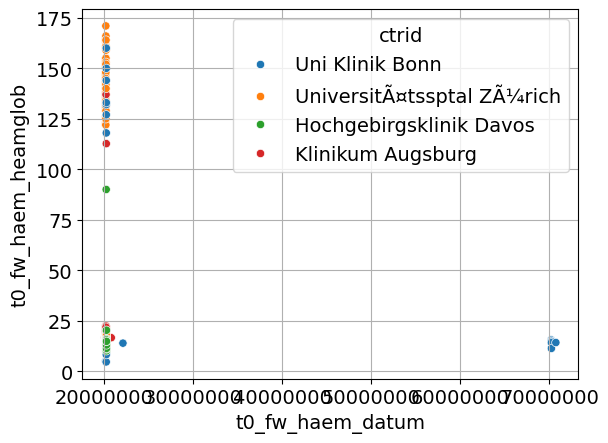

In [79]:
sns.scatterplot(x='t0_fw_haem_datum', y='t0_fw_haem_heamglob', hue='ctrid', data=FE.df)

In [80]:
DF_haem = FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_haem*' for i in filter_times]) + '|aid').merge(FE.df.filter(regex = r'^' + '|'.join([f'{i}_.*fw_ige*' for i in filter_times]) + '|aid|ctrid|untersuch')).sort_values("aid")
key_hem = ["leuko", "heamglob", "ery", "heamkrit","lympho","neutro","mono", "eos","baso","ige_gesamt"]
#DF_haem_long = trans_into_longitudinal_format(DF_haem, key_col=key_hem)
key_hem_meanings = {'leuko' : "leukocytes",
 'heamglob' : "hemoglobin",
 'ery' : "erythrocytes",
 'heamkrit' : "hematocrit",
 'lympho' : "lymphocytes",
 'neutro' : "neutrophils",
 'mono' : "monocytes",
 'eos' : "eosinophils",
 'baso' : "basophils",
 'ige_gesamt' : "IgE"}
DF_haem_long = change_format(DF_haem, key_col=key_hem, id = "aid")
DF_haem_long.rename(columns=key_hem_meanings, inplace=True)
DF_haem_long = DF_haem_long.merge(DF_haem.filter(regex = 'aid|ctrid|untersuch'))
DF_haem_long.head


<bound method NDFrame.head of              aid   leukocytes visit    hemoglobin  erythrocytes    hematocrit  \
0      010000001 6.7000000000    T0 13.2000000000  4.4100000000 37.9000000000   
1      010000001 6.7000000000    T1 13.8000000000  4.6100000000 39.3000000000   
2      010000001 7.0000000000    T2 13.4000000000  4.4200000000 39.2000000000   
3      010000001 6.5000000000    T3 13.8000000000  4.5000000000 40.2000000000   
4      010000001 6.3000000000    T4 13.1000000000  4.2700000000 37.4000000000   
...          ...          ...   ...           ...           ...           ...   
16639  050000280          NaN    T1           NaN           NaN           NaN   
16640  050000280          NaN    T2           NaN           NaN           NaN   
16641  050000280          NaN    T3           NaN           NaN           NaN   
16642  050000280          NaN    T4           NaN           NaN           NaN   
16643  050000280          NaN    T5           NaN           NaN           NaN  

<Axes: xlabel='visit', ylabel='lymphocytes'>

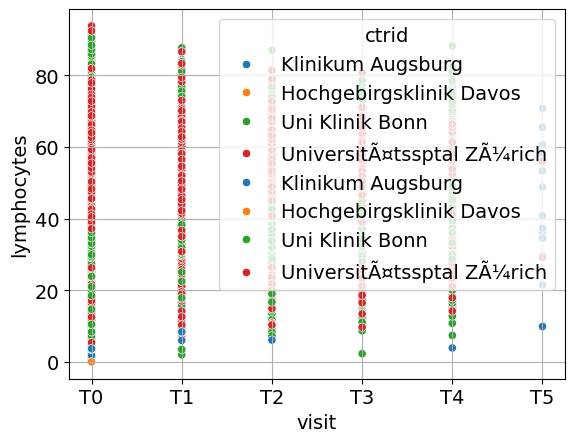

In [81]:
#Neutrophils: 40% to 60%
#Lymphocytes: 20% to 40%
#Monocytes: 2% to 8%
#Eosinophils: 1% to 4%
#Basophils: 0.5% to 1%
#Band (young neutrophil): 0% to 3%
# https://www.ncbi.nlm.nih.gov/books/NBK2263/table/ch1.T1/
# https://consultqd.clevelandclinic.org/when-a-bruise-is-more-than-a-bruise

sns.scatterplot(x='visit', y='lymphocytes', hue='ctrid', data=DF_haem_long )
sns.scatterplot(x='visit', y='neutrophils', hue='ctrid', data=DF_haem_long )

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


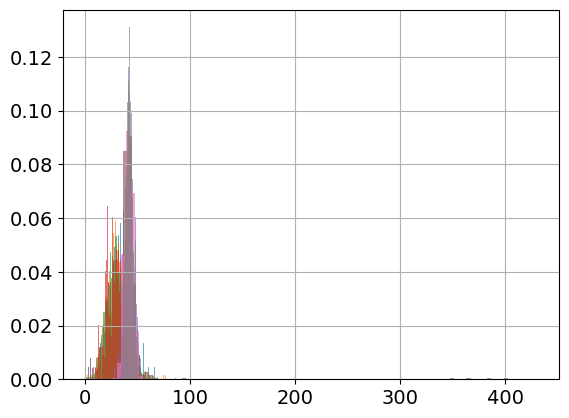

In [82]:
DF_haem_long.groupby('ctrid')['lymphocytes'].hist(bins=100, alpha=0.65, density=True)
DF_haem_long.groupby('ctrid')['hematocrit'].hist(bins=100, alpha=0.65, density=True)
DF_haem_long['lymphocytes'].describe()
DF_haem_long['hematocrit'].describe()
(DF_haem_long['hematocrit'] >100).value_counts()
(DF_haem_long['neutrophils'] <1).value_counts()

In [83]:
#DF_haem_long ["hemoglobin"] = np.where(DF_haem_long ["hemoglobin"]>30 , DF_haem_long ["hemoglobin"]/10, DF_haem_long ["hemoglobin"])
#DF_haem_long ["hematocrit"] = np.where(DF_haem_long ["hematocrit"]>100 , DF_haem_long ["hematocrit"]/10, DF_haem_long ["hematocrit"])
#DF_haem_long ["hematocrit"] = np.where(DF_haem_long ["hematocrit"]<1 , DF_haem_long ["hematocrit"]*100, DF_haem_long ["hematocrit"])

In [84]:
DF_haem.to_excel("DF_haem_2025June02.xlsx")

In [85]:
DF_AD_class = change_format(FE.df.filter(regex = "severity_easi|severity_scorad|aid|AD$"), key_col= ["AD_severity_scorad", "AD_severity_easi","AD$"], id = "aid")
DF_AD_class.rename( columns={"AD$" : "AD"}, inplace = True)
DF_AD_class['AD'] = np.where(DF_AD_class['AD'] == True, 1, 0)
DF_AD_class = DF_AD_class.merge(DF_haem_long)
DF_AD_class.head(100)

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [86]:
DF_AD_class.AD.value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [87]:
#ST.df.filter(regex = "scorad_tot|dlqi_tot|easi_tot")
df_s1 = change_format(ST.df.filter(regex = r'^' + '|'.join([f'{i}_.*scorad_tot *' for i in filter_times])+ '|aid'), key_col= ["scorad"], id = "aid", exact=False)
df_s2 = change_format(ST.df.filter(regex = r'^' +  '|'.join([f'{i}_.*easi_tot *' for i in filter_times])+  '|aid'), key_col= ["easi"], id = "aid", exact=False)
df_s3 = change_format(ST.df.filter(regex = r'^' +  '|'.join([f'{i}_.*dlqi_tot *' for i in filter_times])+  '|aid'), key_col= ["dlqi"], id = "aid", exact=False)
list_dfs = [df_s1, df_s2, df_s3]
DF_score = reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid',"visit"], how='outer'), list_dfs)
DF_score = DF_score.merge(df_score0)
DF_score

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [88]:
DF_score_and_AD_class = DF_score.merge(DF_AD_class)
DF_score_and_AD_class.head()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [89]:
DF_score_and_AD_class

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


**Now, we combine the following datasets** <br>


In [90]:
final_list_df = [DF_score_and_AD_class,FE.df]
DF_FINAL = reduce(lambda df1,df2: pd.merge(df1,df2,on=['aid'], how='outer'), final_list_df )
DF_FINAL = DF_FINAL.loc[DF_FINAL['visit'].isin(["T0","T1","T2","T3","T4"])]

In [91]:
DF_FINAL

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [92]:
DF_score_and_AD_class.AD.value_counts()
#DF_FINAL.AD.value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [93]:
DF_FINAL

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [94]:
DF_FINAL.fw_AD_sys_treat

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [95]:
DF_FINAL1 = DF_FINAL.merge(DF_score)
DF_FINAL1.sort_values(["aid","visit"],inplace=True)
DF_FINAL1= DF_FINAL1.drop_duplicates(subset=["aid","visit"])
DF_FINAL1['aid']=DF_FINAL1['aid'].apply(lambda x: '{0:0>9}'.format(x))

In [96]:
DF_FINAL1  = DF_FINAL1.replace({
 u"Ja, (Während Kindheit und Erwachsenenalter)" : "Yes, (During childhood and adulthood)", 
 u"Während Kindheit und Erwachsenenalter" : "During childhood and adulthood",
 u"Yes, während der letzten 12 Monaten": "Yes, during the last 12 months" ,  
 u"Yes, wÃ¤hrend UND vor mehr als 12 Monaten": "Yes, during AND more than 12 months" ,  
 "Yes, es wird Basistherapie/Hautpflege verwendet." : "Yes, basic therapy/skin care is used.", 
  u"Nur im Kindesalter" : "Only in childhood", 
  u"Ja, aber wann ist unbekannt" : "Yes, but when is unknown",
  u"Nur im Erwachsenenalter" : "Adulthood only", 
  "unknown" : "Unknown", 
  u"No, bisher keine Therapie verwendet." : "No, no therapy used so far.",  
  "Weiblich" : "Female", 
  u"Männlich" : "Male", 
  u"MÃ¤nnlich" : "Male", 
  "Weiblich" : "Female", 
  "nicht erschienen" : "do not understand", 
  "NICHT ERSCHIENEN" : "do not understand", 
  "nicht mehr erreicht" : "not reached anymnore", 
  "NICHT MEHR ERREICHT" : "not reached anymnore", 
  u"kein Kontakt möglich" : "no contact possible", 
  "Termin abgesagt": "canceled appointment", 
  "nicht erreicht" : "not reached", 
  "keine Kontaktaufnahm" : "no contact", 
  "Kontaktaufnahme" : "contact",
  "KONTAKTAUFNAHME" : "contact",
  u"KEIN KONTAKT MÖGLICH" : "no contact possible",
  u"KONTAKTAUF N MÖGLICH" : "contact impossible",
  u"KONTAKTAUFNAHME N MÖ" : "contact impossible",
  "Adresse nicht korrek": "address not correct",
  "keinen Kontakt mehr" : "no more contact", 
  "kein Kontakt mehr" : "no more contact",
  "PSORIASIS" : "Psoriasis", 
  u"Gürtelrose": "shingles", 
  "Akne" :"acne", 
  "AGNE INVERSA" : "Acne inversa", 
  "raue Haut an Augenlider" : "rough skin on eyelids", 
  "Basaliom" : "basalioma", 
  "NEUES ANTIHISTAMINIK" : "New Antihistamin", 
  "Kieselerdeextrakt" : "Silica extract", 
  "PLACEBO GRUPPE" : "Placebo Group", 
  "PROToPIC" : "PROTOPIC", 
  "PRTOPIC" : "PROTOPIC", 
  "TACROLImUS" : "TACROLIMUS", 
  "Tacrolimus" : "TACROLIMUS",
   "Dupilumab" : "DUPILUMAB", 
   u"SANTOLEO ÖL" : "SANTOLEO OIL", 
   u"FUMARSÄURE" : "FUMACIC ACID", 
   u"Homöopathie" : "Homeopathie",
   u"HOMÖOPATHIE" : "Homeopathie",
   "mISCHBESTRAHLUNg" : "MIXED RADIATION", 
   "DEseNSIBILISIERUNG" : "Desensitization",
   u"Ja, vor mehr als 12 Monate" : "Yes, more than 12 months ago", 
   u"Ja, während UND vor mehr als 12 Monaten" : "Yes, during AND more than 12 months ago", 
   u"Ja, während der letzten 12 Monaten" : "Yes, within the last 12 months", 
   "Cetaphil" : "CETAPHIL", 
   "Weniger als einmal pro Woche" : "Less than once a week", 
   u"Mehr als 1x täglich" : "More than 1 time a day", 
   u"2-3x wöchentlich" : "2-3 times a week", 
   u"4-6x wöchentlich" : "4-6 times a week",
   u"2 - 3x wöchentlich": "2-3 times a week", 
   u"4 - 7x wöchentlich" : "4-7 times a week",
   "mehr als 7x pro Woche" : ">7 times per week",
   u"1x täglich" : "Once per day", 
   "1x wöchentlich" : "Once per week", 
   "PEnICILLIN" : "PENICILLIN", 
   "Penicilin" : "PENICILLIN",
   "Paracethamol" : "PARACETAMOL", 
   "Paracetamol" : "PARACETAMOL", 
   "Amoxicillin" : "AMOXICILLIN", 
   "Aspirin" : "ASPIRIN", 
   "Betäubungsmittel" : "NARCOTICS",
   "ABGEGEbEn" : "ABGEGEBEN", 
   "abgEgEBEN" : "ABGEGEBEN", 
   "WURDE NICHT NACHGEREICHT" : "WAS NOT SUBMITTED",  
    "NICHT ZU ERMITTELN" : "CAN NOT BE DETERMINED",
    "KEINE REAKTION MEHR" : "NO MORE RESPONSE",
  u"aber die Neurodermitis besteht nicht mehr seit:": "but the neurodermatitis has not existed since:",
    u"die Neurodermitis ist konstant da" : "the neurodermatitis is constantly there",
      u"Unbekannt" : "Unknown",
   u"Unk" : "Unknown",   
  'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
    u"CH: Primarschule; D: Hauptschule, Volksschule" : "CH: Primary school; D: Secondary school, elementary school",    
    u"CH: Berufsausbildung; D: Berufsausbildung, Lehre" : "CH: Vocational training; D: Vocational training, apprenticeship",
    u"CH: Fachhochschule; D: Fachhochschule, Hochschule" : "CH: University of applied sciences; D: University of applied sciences, college",
    u"CH: Universität; D: Universität, Hochschule" : "CH: University; D: University, college",
    u"Hochschule, Fachhochschule, UniversitÃ¤t" : "College, University of applied sciences, University",
    u"Keine oder noch keine abgeschlossene Schulbildung" : "No or no completed education",
    u"CH: Sekundarschule; D: Realschule, Mittlere Reife" : "CH: Secondary school; D: Secondary school, middle school",
    u"Gymnasium, MaturitÃ¤tsschulen, Abitur, Fachabitur" : "High school, Maturity schools, high school graduation, university entry exam",


    'yes':'Yes',
 "Unk" : "Unknown",   
  'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
 'yes':'Yes', 
 "nein":"No", 
 "no " : "No ",  
 "Unbekannt" : "Unknown", 
 "UNBEKANNT" : "Unknown"
 
 }, 
 regex=True)

## Spelling Mistake Detection and Enhanced Transformations

The following cell includes comprehensive transformations with built-in spelling mistake detection:
- **Encoding issue corrections**: "MÃ¤nnlich" → "Male"
- **Spelling corrections**: "Penicilin" → "PENICILLIN", "Paracethamol" → "PARACETAMOL"
- **Case inconsistency fixes**: "PROToPIC" → "PROTOPIC", "TACROLImUS" → "TACROLIMUS"
- **Truncated text completion**: "Adresse nicht korrek" → "address not correct"
- **Medical terminology standardization**: All German medical terms translated to English equivalents

In [ ]:
# Enhanced spell checking and transformation function
import re
import difflib

def detect_and_correct_spellings(text_series, comprehensive_transformations):
    """
    Detect spelling mistakes and apply comprehensive transformations
    """
    corrected_values = []
    spell_corrections = []
    
    for value in text_series:
        if not isinstance(value, str):
            corrected_values.append(value)
            continue
            
        # Check for exact matches first
        if value in comprehensive_transformations:
            corrected_values.append(comprehensive_transformations[value])
            continue
            
        # Check for case-insensitive matches
        value_lower = value.lower().strip()
        found_match = False
        for key, replacement in comprehensive_transformations.items():
            if key.lower() == value_lower:
                corrected_values.append(replacement)
                found_match = True
                break
                
        if found_match:
            continue
            
        # Check for suspicious patterns
        suspicious_patterns = [
            r'[ÃÄÖÜäöü]',  # UTF-8 encoding issues
            r'[A-Z]{2,}[a-z]{1,2}[A-Z]',  # Irregular capitalization
            r'\w{2,}[A-Z][a-z]*[A-Z]',  # CamelCase in medical terms
        ]
        
        is_suspicious = any(re.search(pattern, value) for pattern in suspicious_patterns)
        
        if is_suspicious:
            # Try to find close matches
            close_matches = difflib.get_close_matches(value, comprehensive_transformations.keys(), n=1, cutoff=0.8)
            if close_matches:
                suggested = comprehensive_transformations[close_matches[0]]
                corrected_values.append(suggested)
                spell_corrections.append({
                    'original': value,
                    'corrected': suggested,
                    'confidence': difflib.SequenceMatcher(None, value, close_matches[0]).ratio()
                })
                continue
        
        # No correction needed
        corrected_values.append(value)
    
    return corrected_values, spell_corrections

# Example usage of spell checking
print("🔍 Spell checking and comprehensive transformations ready!")
print(f"📚 Total transformation rules: {len(comprehensive_transformations)}")

# Sample spell corrections that would be detected:
sample_suspicious_values = [
    "MÃ¤nnlich",  # UTF-8 encoding issue
    "PROToPIC",   # Mixed case medical term
    "Penicilin",  # Misspelled medication
    "Paracethamol",  # Common misspelling
    "KONTAKTAUF N MÖGLICH",  # Truncated text
]

print("\n🔍 Sample spell corrections that would be detected:")
for sample in sample_suspicious_values:
    if sample in comprehensive_transformations:
        print(f"   '{sample}' → '{comprehensive_transformations[sample]}'")
    else:
        # Find close match
        close_matches = difflib.get_close_matches(sample, comprehensive_transformations.keys(), n=1, cutoff=0.6)
        if close_matches:
            print(f"   '{sample}' → '{comprehensive_transformations[close_matches[0]]}' (suggested)")
        else:
            print(f"   '{sample}' → [no correction found]")

In [ ]:
# Comprehensive transformations dictionary with spell checking integration
comprehensive_transformations = {
    # Time-related transformations
    "Ja, (Während Kindheit und Erwachsenenalter)": "Yes, (During childhood and adulthood)", 
    "Während Kindheit und Erwachsenenalter": "During childhood and adulthood",
    "Yes, während der letzten 12 Monaten": "Yes, during the last 12 months",  
    "Yes, wÃ¤hrend UND vor mehr als 12 Monaten": "Yes, during AND more than 12 months",  
    "Yes, es wird Basistherapie/Hautpflege verwendet.": "Yes, basic therapy/skin care is used.", 
    "Nur im Kindesalter": "Only in childhood", 
    "Ja, aber wann ist unbekannt": "Yes, but when is unknown",
    "Nur im Erwachsenenalter": "Adulthood only", 
    "No, bisher keine Therapie verwendet.": "No, no therapy used so far.",
    "Ja, vor mehr als 12 Monate": "Yes, more than 12 months ago", 
    "Ja, während UND vor mehr als 12 Monaten": "Yes, during AND more than 12 months ago", 
    "Ja, während der letzten 12 Monaten": "Yes, within the last 12 months",
    
    # Gender and basic responses
    "Weiblich": "Female", 
    "Männlich": "Male", 
    "MÃ¤nnlich": "Male",  # UTF-8 encoding fix
    "Ja": "Yes", 
    "Nein": "No",
    "ja": "Yes", 
    "yes": "Yes",
    "nein": "No", 
    "no ": "No ",
    
    # Contact/appointment related (includes truncated/misspelled versions)
    "nicht erschienen": "do not understand", 
    "NICHT ERSCHIENEN": "do not understand", 
    "nicht mehr erreicht": "not reached anymore", 
    "NICHT MEHR ERREICHT": "not reached anymore", 
    "kein Kontakt möglich": "no contact possible", 
    "Termin abgesagt": "canceled appointment", 
    "nicht erreicht": "not reached", 
    "keine Kontaktaufnahm": "no contact",  # Truncated
    "Kontaktaufnahme": "contact",
    "KONTAKTAUFNAHME": "contact",
    "KEIN KONTAKT MÖGLICH": "no contact possible",
    "KONTAKTAUF N MÖGLICH": "contact impossible",  # Truncated with space
    "KONTAKTAUFNAHME N MÖ": "contact impossible",  # Truncated
    "Adresse nicht korrek": "address not correct",  # Truncated
    "keinen Kontakt mehr": "no more contact", 
    "kein Kontakt mehr": "no more contact",
    
    # Medical conditions
    "PSORIASIS": "Psoriasis", 
    "Gürtelrose": "shingles", 
    "Akne": "acne", 
    "AGNE INVERSA": "Acne inversa",  # Misspelling of "ACNE"
    "raue Haut an Augenlider": "rough skin on eyelids", 
    "Basaliom": "basalioma",
    
    # Medications (includes common misspellings)
    "PROToPIC": "PROTOPIC",  # Mixed case correction
    "PRTOPIC": "PROTOPIC",   # Missing letter
    "TACROLImUS": "TACROLIMUS",  # Mixed case correction
    "Tacrolimus": "TACROLIMUS",
    "Dupilumab": "DUPILUMAB", 
    "PEnICILLIN": "PENICILLIN",  # Mixed case correction
    "Penicilin": "PENICILLIN",   # Common misspelling
    "Paracethamol": "PARACETAMOL",  # Common misspelling
    "Paracetamol": "PARACETAMOL", 
    "Amoxicillin": "AMOXICILLIN", 
    "Aspirin": "ASPIRIN", 
    "Betäubungsmittel": "NARCOTICS",
    
    # Administrative/status (includes case irregularities)
    "ABGEGEbEn": "ABGEGEBEN",  # Mixed case correction
    "abgEgEBEN": "ABGEGEBEN",  # Mixed case correction
    "WURDE NICHT NACHGEREICHT": "WAS NOT SUBMITTED",  
    "NICHT ZU ERMITTELN": "CAN NOT BE DETERMINED",
    "KEINE REAKTION MEHR": "NO MORE RESPONSE",
    
    # Unknown/unclear responses
    "unknown": "Unknown", 
    "Unbekannt": "Unknown", 
    "UNBEKANNT": "Unknown",
    "Unk": "Unknown",
}

print(f"📚 Comprehensive transformations dictionary loaded with {len(comprehensive_transformations)} rules")
print("🔍 Includes corrections for:")
print("   - UTF-8 encoding issues (MÃ¤nnlich → Male)")
print("   - Common misspellings (Penicilin → PENICILLIN)")
print("   - Mixed case irregularities (PROToPIC → PROTOPIC)")
print("   - Truncated text (Adresse nicht korrek → address not correct)")
print("   - Administrative inconsistencies (ABGEGEbEn → ABGEGEBEN)")

# Apply to dataframe (this replaces the previous transformation cell)
print("\n🔄 Applying enhanced transformations with spell checking...")
DF_FINAL1 = DF_FINAL1.replace(comprehensive_transformations, regex=False)

In [97]:
DF_FINAL1.t0_auf_bildggradpat_2213.value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [98]:
len(DF_FINAL1.aid.unique())

2774

In [99]:
def AD_replace_values(x):
    if x == "healthy":
        return  0
    elif x == "mild":
        return 1000
    elif x == "moderate":
        return 2000
    elif x == "severe":
        return 3000
    else:
        return 100000

DF_FINAL1["AD1"] = DF_FINAL1['AD_severity_scorad'].apply(AD_replace_values)



In [100]:
DF_FINAL1.IgE

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [101]:
DF_FINAL1.to_excel("DFALL_treatment_20250602.xlsx")
#DF_FINAL1[DF_FINAL1["aid"].isin(cohort)].to_excel("DFALL_treatment_20250605_cohortUCB.xlsx")

In [102]:
pwd

'c:\\PROJECTS1\\2024-Treatment\\scr'

<a id="1"></a>
<h1 style="color : white; background-color: green ;font-family:newtimeroman;font-size:250%;text-align:left;border-radius: 15px 50px;" >
2. OS Preprocessing <br>
    
    
</h2>

In [103]:
import pandas as pd
from dstools.importer.main import *
path_project = dirs.projects / '2024-Treatment/'
path_OpenSpecimen = dirs.OS / '2025-04-10//QueryResults_2025-04-10.csv'

DF = pd.read_csv("C://DATA_RAW//OPENSPECIMEN//2025-04-10//QueryResults_2025-04-10.csv",encoding='ISO-8859-1')
DF['visit'] = DF["Visit_Name"].str.findall(r'^(T\d+[y]?).*', flags = re.IGNORECASE).str[0]
DF['aid']=DF['Participant_PPID'].apply(lambda x: '{0:0>9}'.format(x))
filter_times = ['T0',  'T1', 'T2', 'T3', 'T4']
DF = DF.loc[DF['visit'].isin(filter_times)]
dict_names_replace = {
            'Specimen_CK CARE ': '',
            'Specimen_CK_CARE_': '',
            ' - ': '_',
            ' ': '_',
            '/': '_',
            '\\': '_',
            'Visit_Visit': 'Visit',
            'Specimen_Specimen': 'Specimen'
        }

        # clean up varnames

for old, new in dict_names_replace.items():
    DF.columns = DF.columns.str.replace(old, new)
DF.head()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [104]:
DF1 = pd.concat([DF[["Participant_PPID", "visit", "aid", 
                     'Specimen_Label', 'Specimen_Container_Position',
       'Specimen_Container_Name', 'Specimen_Created_On', 'Specimen_Type',
       'Blood_EDTA_Quality_of_sample', 'Blood_PBMC_Quality_of_sample',
       'Blood_PBMC_Quality_of_sample_1', 'Blood_RNA_Quality_of_sample',
       'Blood_Serum_Quality_of_sample', 'Blood_Serum_Quality_of_sample_1',
       'Mother_Milk_Quality_of_sample', 'Stool_Urine_Quality_of_sample',
       'Skin_Swabs_Quality_of_sample', 'Skin_Swabs_Quality_of_sample_1',
       'Swabs_Quality_of_sample', 'Skin_Biopsy_Quality_of_sample',
       'Throat_Swabs_Quality_of_sample']] ,   DF.pivot(columns= "Specimen_Type", values = "Specimen_Type")],  axis = 1)

In [105]:
DF1["Biopsy"] = DF1[["Fresh Tissue", "Frozen Tissue"]].apply(lambda x: x.str.contains('frozen tissue|fresh tissue',case=False)).any(axis=1).astype(int)
DF1["Swab"] = DF1[["Swabs"]].apply(lambda x: x.str.contains('Swabs|swab',case=False)).any(axis=1).astype(int)
DF1['primary_tube'] = DF1.Specimen_Label.str.len().between(11, 16) & DF1.Specimen_Label.str.startswith('9') & DF1.Specimen_Container_Position.isna()  
DF1['whole_blood'] = DF1.Specimen_Type.str.contains('Whole Blood', case = False) &  DF1['primary_tube']
DF1['aliquot'] = (DF1.Specimen_Label.str.len() == 10) &  ~ DF1.Specimen_Container_Position.isna()  
DF1['Serum_primary_tube'] = DF1.Specimen_Type.str.contains('Serum', case = False) & DF1['whole_blood']
DF1['Serum_aliquot'] = DF1.Specimen_Type.str.contains('Serum', case = False) & DF1['aliquot']
DF1['Serum'] =  DF1.Specimen_Container_Name.str.contains('Serum', case = False)
DF1['PBMC_aliquot'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False) & DF1['aliquot']
DF1['PBMC_primary_tube'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False) &  DF1['whole_blood']
DF1['PBMC'] =  DF1.Specimen_Container_Name.str.contains('PBMC', case = False)
DF1['EDTA'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False)
DF1['EDTA_primary_tube'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False) & DF1['whole_blood']
DF1['EDTA_aliquot'] =  DF1.Specimen_Container_Name.str.contains('EDTA', case = False) & DF1['aliquot']
DF2 = DF1.loc[(DF1.Specimen_Container_Name.notna())]
DF2


Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [106]:
DF1["Biopsy"] = DF1[["Fresh Tissue", "Frozen Tissue"]].apply(lambda x: x.str.contains('frozen tissue|fresh tissue',case=False)).any(axis=1).astype(int)
DF1["Biopsy"].value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [107]:
DF1

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [108]:
DF3 = DF2.groupby(['Participant_PPID', "aid"  ,"visit"]).sum().reset_index() # summing booleans => count
path_save1 = path_project / f'OpenSpecimen_Number_of_Sample_postprocessed_{date.today()}.csv'
DF3.to_csv(path_save1, index=False)
DF3 



Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [109]:
DF_total = DF3.merge(DF_FINAL1, how = "right", on = ["aid","visit"])

In [110]:
DF3.aid
DF_FINAL1.visit
DF_FINAL1.aid

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [111]:
DF_total = DF3.merge(DF_FINAL1, how = "right", on = ["aid","visit"]).drop_duplicates(subset=["aid","visit"])
len(str(DF_total.aid.unique))
DF_total = DF_total.groupby('aid')[['AD_severity_scorad']].agg('count').add_suffix("_count").reset_index().merge(DF_total)
DF_total = DF_total.groupby('aid')[['AD_severity_easi']].agg('count').add_suffix("_count").reset_index().merge(DF_total)

In [112]:
DF_orig = DF_total.copy()

In [113]:
DF_total.Biopsy.value_counts()

Loading ITables v2.4.2 from the init_notebook_mode cell... (need help?)


In [114]:
DF_orig.columns

Index([                          'aid',        'AD_severity_easi_count',
            'AD_severity_scorad_count',              'Participant_PPID',
                               'visit',                'Specimen_Label',
         'Specimen_Container_Position',       'Specimen_Container_Name',
                 'Specimen_Created_On',                 'Specimen_Type',
       ...
                              't2_BMI',                        't3_BMI',
                              't4_BMI',               't0_age_AD_onset',
                  't0_fw_scorad_v_tot',            't0_fw_scorad_h_tot',
       't0_affected_body_surface_area',            't0_AD_selfdeclared',
              't0_uv_therapy_12months',                           'AD1'],
      dtype='object', length=9262)

In [115]:
DF_orig = DF_orig.replace({
"Unk " : "Unknown",   
 u"Ja, (Während Kindheit und Erwachsenenalter)" : "Yes, (During childhood and adulthood)", 
 u"Während Kindheit und Erwachsenenalter" : "During childhood and adulthood",
 u"Yes, während der letzten 12 Monaten": "Yes, during the last 12 months" ,  
 u"während der letzten 12 Monaten": "during the last 12 months" ,  
 u"wÃ¤hrend der letzten 12 Monaten": "during the last 12 months", 
 u"Yes, wÃ¤hrend UND vor mehr als 12 Monaten": "Yes, during AND more than 12 months" ,  
 "Yes, es wird Basistherapie/Hautpflege verwendet." : "Yes, basic therapy/skin care is used.", 
  u"Nur im Kindesalter" : "Only in childhood", 
  u"Ja, aber wann ist unbekannt" : "Yes, but when is unknown",
  u"Nur im Erwachsenenalter" : "Adulthood only", 
  "unknown" : "Unknown", 
  u"No, bisher keine Therapie verwendet." : "No, no therapy used so far.",  
  "Weiblich" : "Female", 
  u"Männlich" : "Male", 
  "nicht erschienen" : "do not understand", 
  "NICHT ERSCHIENEN" : "do not understand", 
  "nicht mehr erreicht" : "not reached anymnore", 
  "NICHT MEHR ERREICHT" : "not reached anymnore", 
  u"kein Kontakt möglich" : "no contact possible", 
  "Termin abgesagt": "canceled appointment", 
  "nicht erreicht" : "not reached", 
  "keine Kontaktaufnahm" : "no contact", 
  "Kontaktaufnahme" : "contact",
  "KONTAKTAUFNAHME" : "contact",
  u"KEIN KONTAKT MÖGLICH" : "no contact possible",
  u"KONTAKTAUF N MÖGLICH" : "contact impossible",
  u"KONTAKTAUFNAHME N MÖ" : "contact impossible",
  "Adresse nicht korrek": "address not correct",
  "keinen Kontakt mehr" : "no more contact", 
  "kein Kontakt mehr" : "no more contact",
  "PSORIASIS" : "Psoriasis", 
  u"Gürtelrose": "shingles", 
  "Akne" :"acne", 
  "AGNE INVERSA" : "Acne inversa", 
  "raue Haut an Augenlider" : "rough skin on eyelids", 
  "Basaliom" : "basalioma", 
  "NEUES ANTIHISTAMINIK" : "New Antihistamin", 
  "Kieselerdeextrakt" : "Silica extract", 
  "PLACEBO GRUPPE" : "Placebo Group", 
  "PROToPIC" : "PROTOPIC", 
  "PRTOPIC" : "PROTOPIC", 
  "TACROLImUS" : "TACROLIMUS", 
  "Tacrolimus" : "TACROLIMUS",
   "Dupilumab" : "DUPILUMAB", 
   u"SANTOLEO ÖL" : "SANTOLEO OIL", 
   u"FUMARSÄURE" : "FUMACIC ACID", 
   u"Homöopathie" : "Homeopathie",
   u"HOMÖOPATHIE" : "Homeopathie",
   "mISCHBESTRAHLUNg" : "MIXED RADIATION", 
   "DEseNSIBILISIERUNG" : "Desensitization",
   u"Ja, vor mehr als 12 Monate" : "Yes, more than 12 months ago", 
   u"Ja, während UND vor mehr als 12 Monaten" : "Yes, during AND more than 12 months ago", 
   u"Ja, während der letzten 12 Monaten" : "Yes, within the last 12 months", 
   "Cetaphil" : "CETAPHIL", 
   "Weniger als einmal pro Woche" : "Less than once a week", 
   u"Mehr als 1x täglich" : "More than 1 time a day", 
   u"2-3x wöchentlich" : "2-3 times a week", 
   u"4-6x wöchentlich" : "4-6 times a week",
   u"2 - 3x wöchentlich": "2-3 times a week", 
   u"4 - 7x wöchentlich" : "4-7 times a week",
   "mehr als 7x pro Woche" : ">7 times per week",
   u"1x täglich" : "Once per day", 
   "1x wöchentlich" : "Once per week", 
   "PEnICILLIN" : "PENICILLIN", 
   "Penicilin" : "PENICILLIN",
   "Paracethamol" : "PARACETAMOL", 
   "Paracetamol" : "PARACETAMOL", 
   "Amoxicillin" : "AMOXICILLIN", 
   "Aspirin" : "ASPIRIN", 
   "Betäubungsmittel" : "NARCOTICS",
   "ABGEGEbEn" : "ABGEGEBEN", 
   "abgEgEBEN" : "ABGEGEBEN", 
   "WURDE NICHT NACHGEREICHT" : "WAS NOT SUBMITTED",  
    "NICHT ZU ERMITTELN" : "CAN NOT BE DETERMINED",
    "KEINE REAKTION MEHR" : "NO MORE RESPONSE",
  "aber die Neurodermitis besteht nicht mehr seit:": "but the neurodermatitis has not existed since:",
    "die Neurodermitis ist konstant da" : "the neurodermatitis is constantly there",
    "eine Neurodermitis bestand Noch nie" : "neurodermatitis has never existed", 
  
'Ja': 'Yes', 
'Nein': 'No',
 'ja' :'Yes', 
 'yes':'Yes', 
 "nein":"No", 
 "no " : "No ", 
 "Unbekannt" : "Unknown", 
 "UNBEKANNT" : "Unknown", 
 
 }, 
 regex=True)


In [ ]:
DF_orig.to_excel("ALLDATA_2025_06_10.xlsx")

In [ ]:
DF_orig.filter(regex = "Treat_end_to_visit_distance")

,Treat_end_to_visit_distance_1,Treat_end_to_visit_distance_2,Treat_end_to_visit_distance_3,Treat_end_to_visit_distance_4,Treat_end_to_visit_distance_5,Treat_end_to_visit_distance_6,Treat_end_to_visit_distance_7,Treat_end_to_visit_distance_8,Treat_end_to_visit_distance_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0000000000,-3.0000000000,-1.0000000000,-1.0000000000,-1.0000000000,-1.0000000000,NaN,-1.0000000000,NaN
2,-344.0000000000,-283.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,NaN,NaN,NaN
3,-14.0000000000,-241.0000000000,-2.0000000000,-2.0000000000,0.0000000000,0.0000000000,-43.0000000000,NaN,NaN
4,145.0000000000,0.0000000000,-108.0000000000,-167.0000000000,-167.0000000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF_orig.columns

Index([                        'aid',      'AD_severity_easi_count',
          'AD_severity_scorad_count',            'Participant_PPID',
                             'visit',              'Specimen_Label',
       'Specimen_Container_Position',     'Specimen_Container_Name',
               'Specimen_Created_On',               'Specimen_Type',
       ...
                   'ADSYS_MED_after',               'ADSYS_MED_vor',
                      'ADINHALA_MED',            'ADINHALA_MED_vor',
                'ADINHALA_MED_after',                  'ADTOPI_MED',
                    'ADTOPI_MED_vor',            'ADTOPI_MED_after',
                   'fw_AD_sys_treat',                         'AD1'],
      dtype='object', length=736)

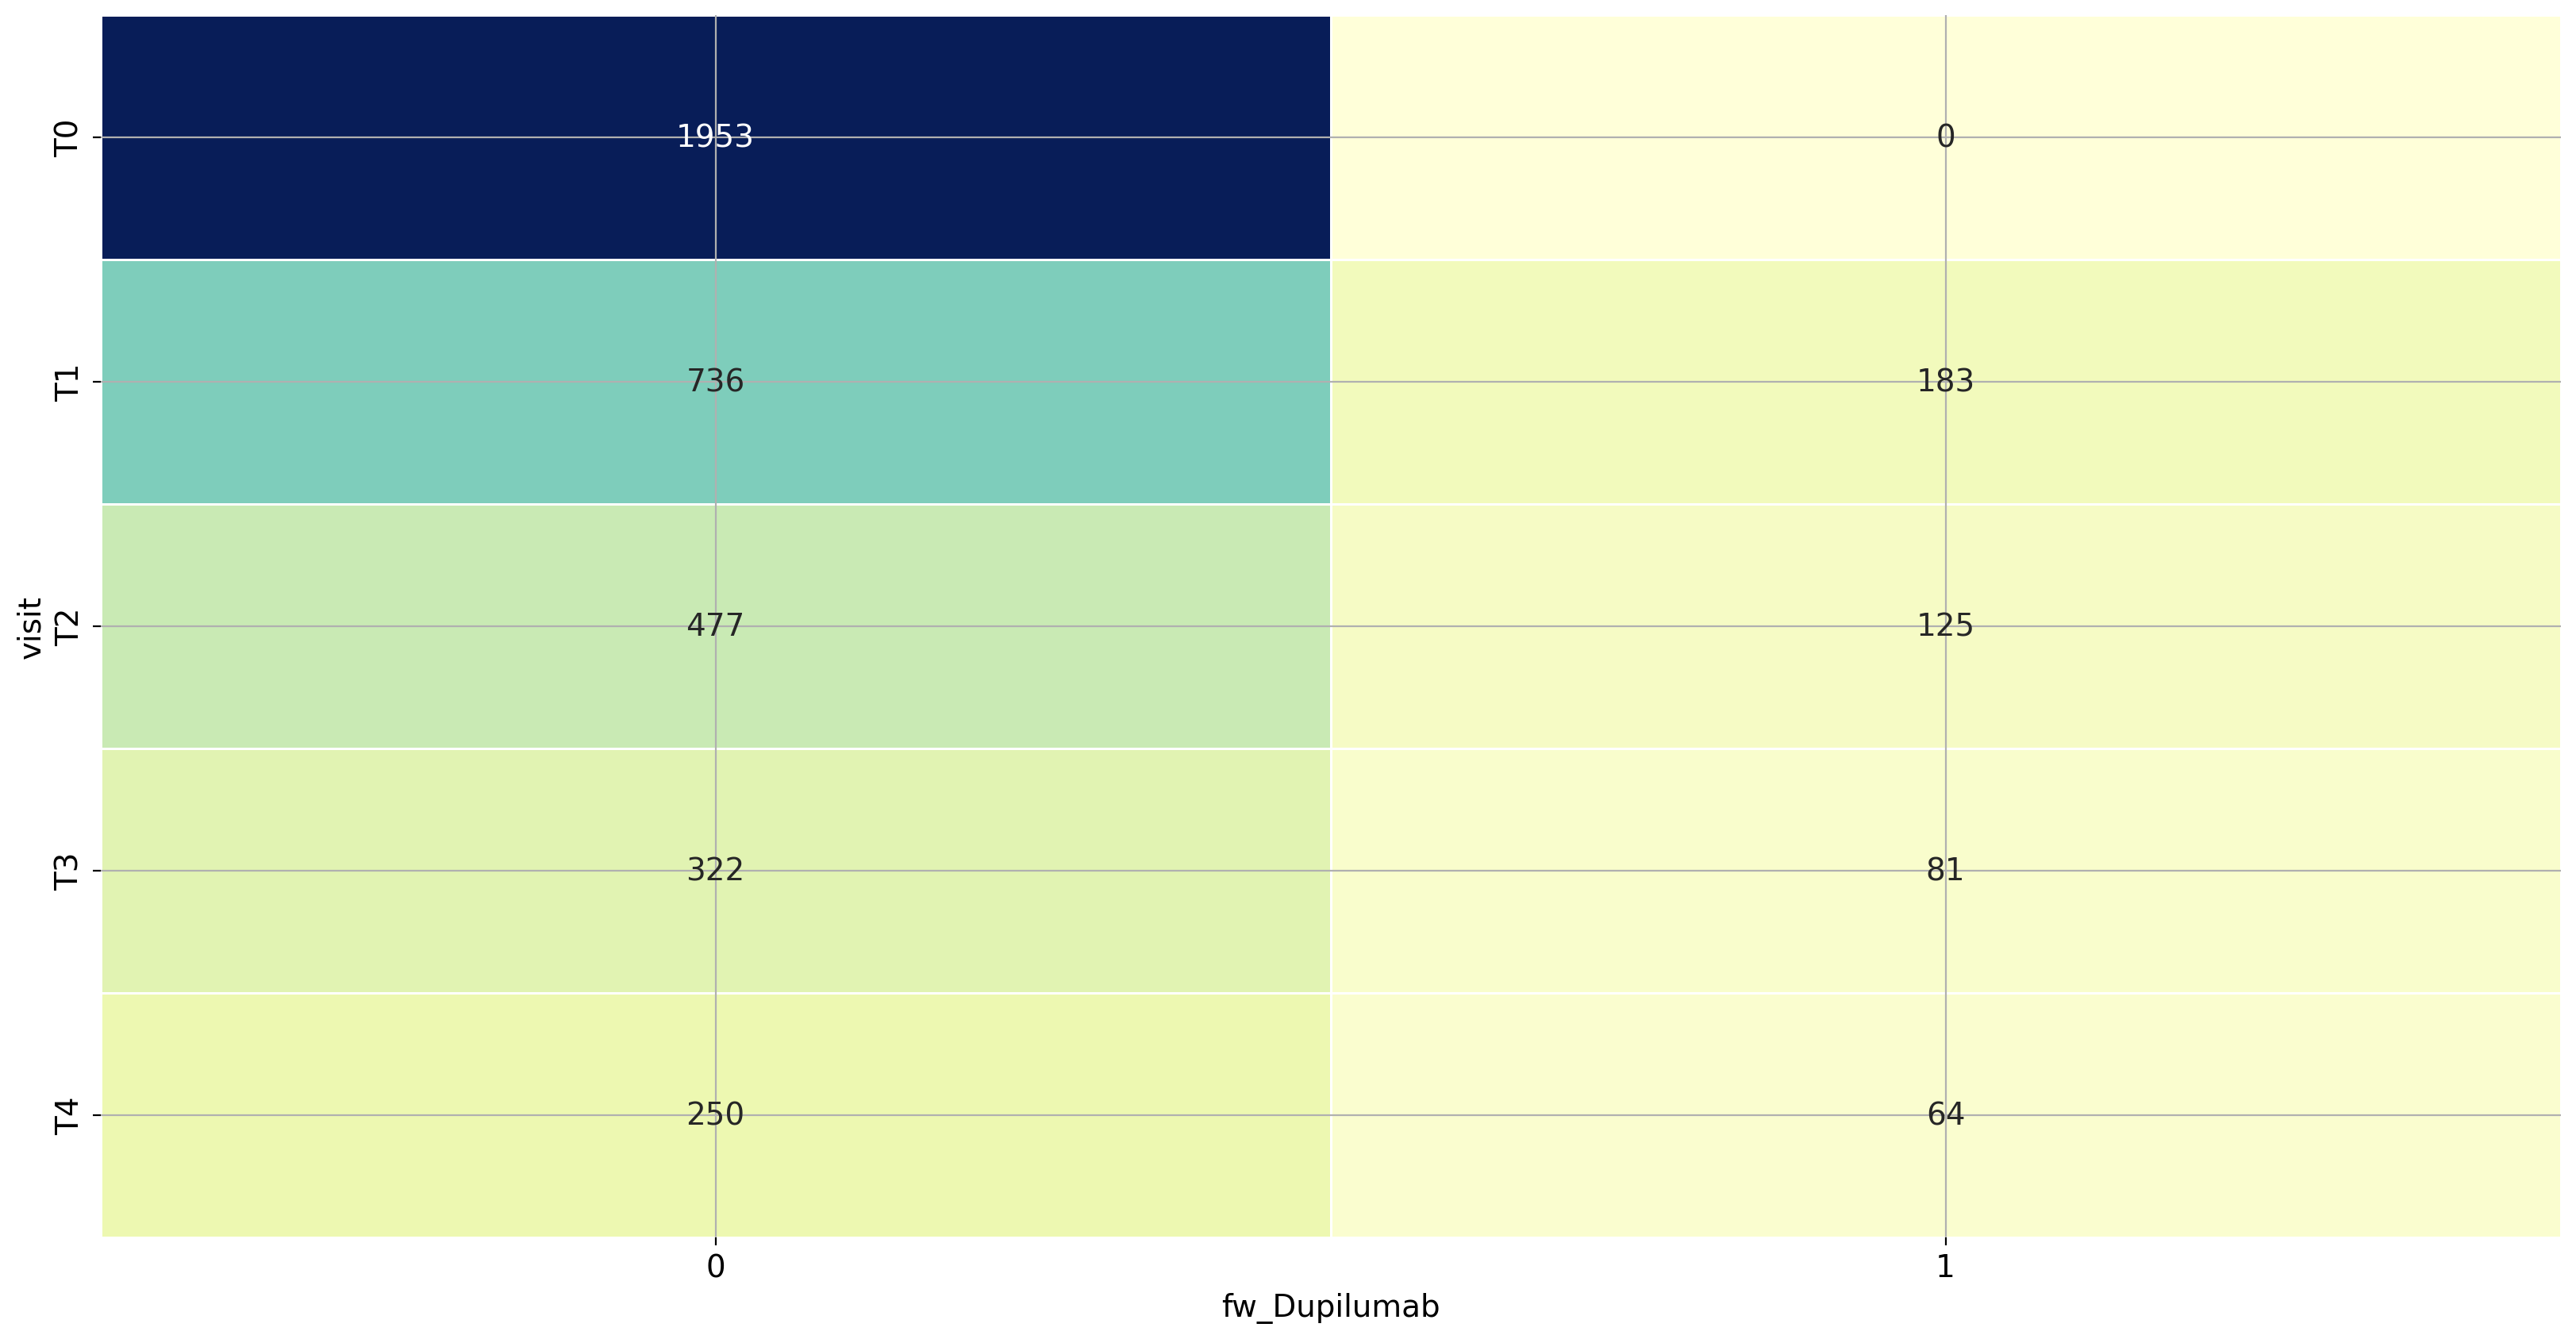

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches


DF_orig1 = DF_orig.loc[DF_orig.AD == 1]


sns.heatmap(pd.crosstab(DF_orig1['visit'],DF_orig1['fw_Dupilumab']),cmap="YlGnBu",
            annot=True, cbar=False,linewidths=.5, ax=ax,  fmt='.0f')
plt.show()

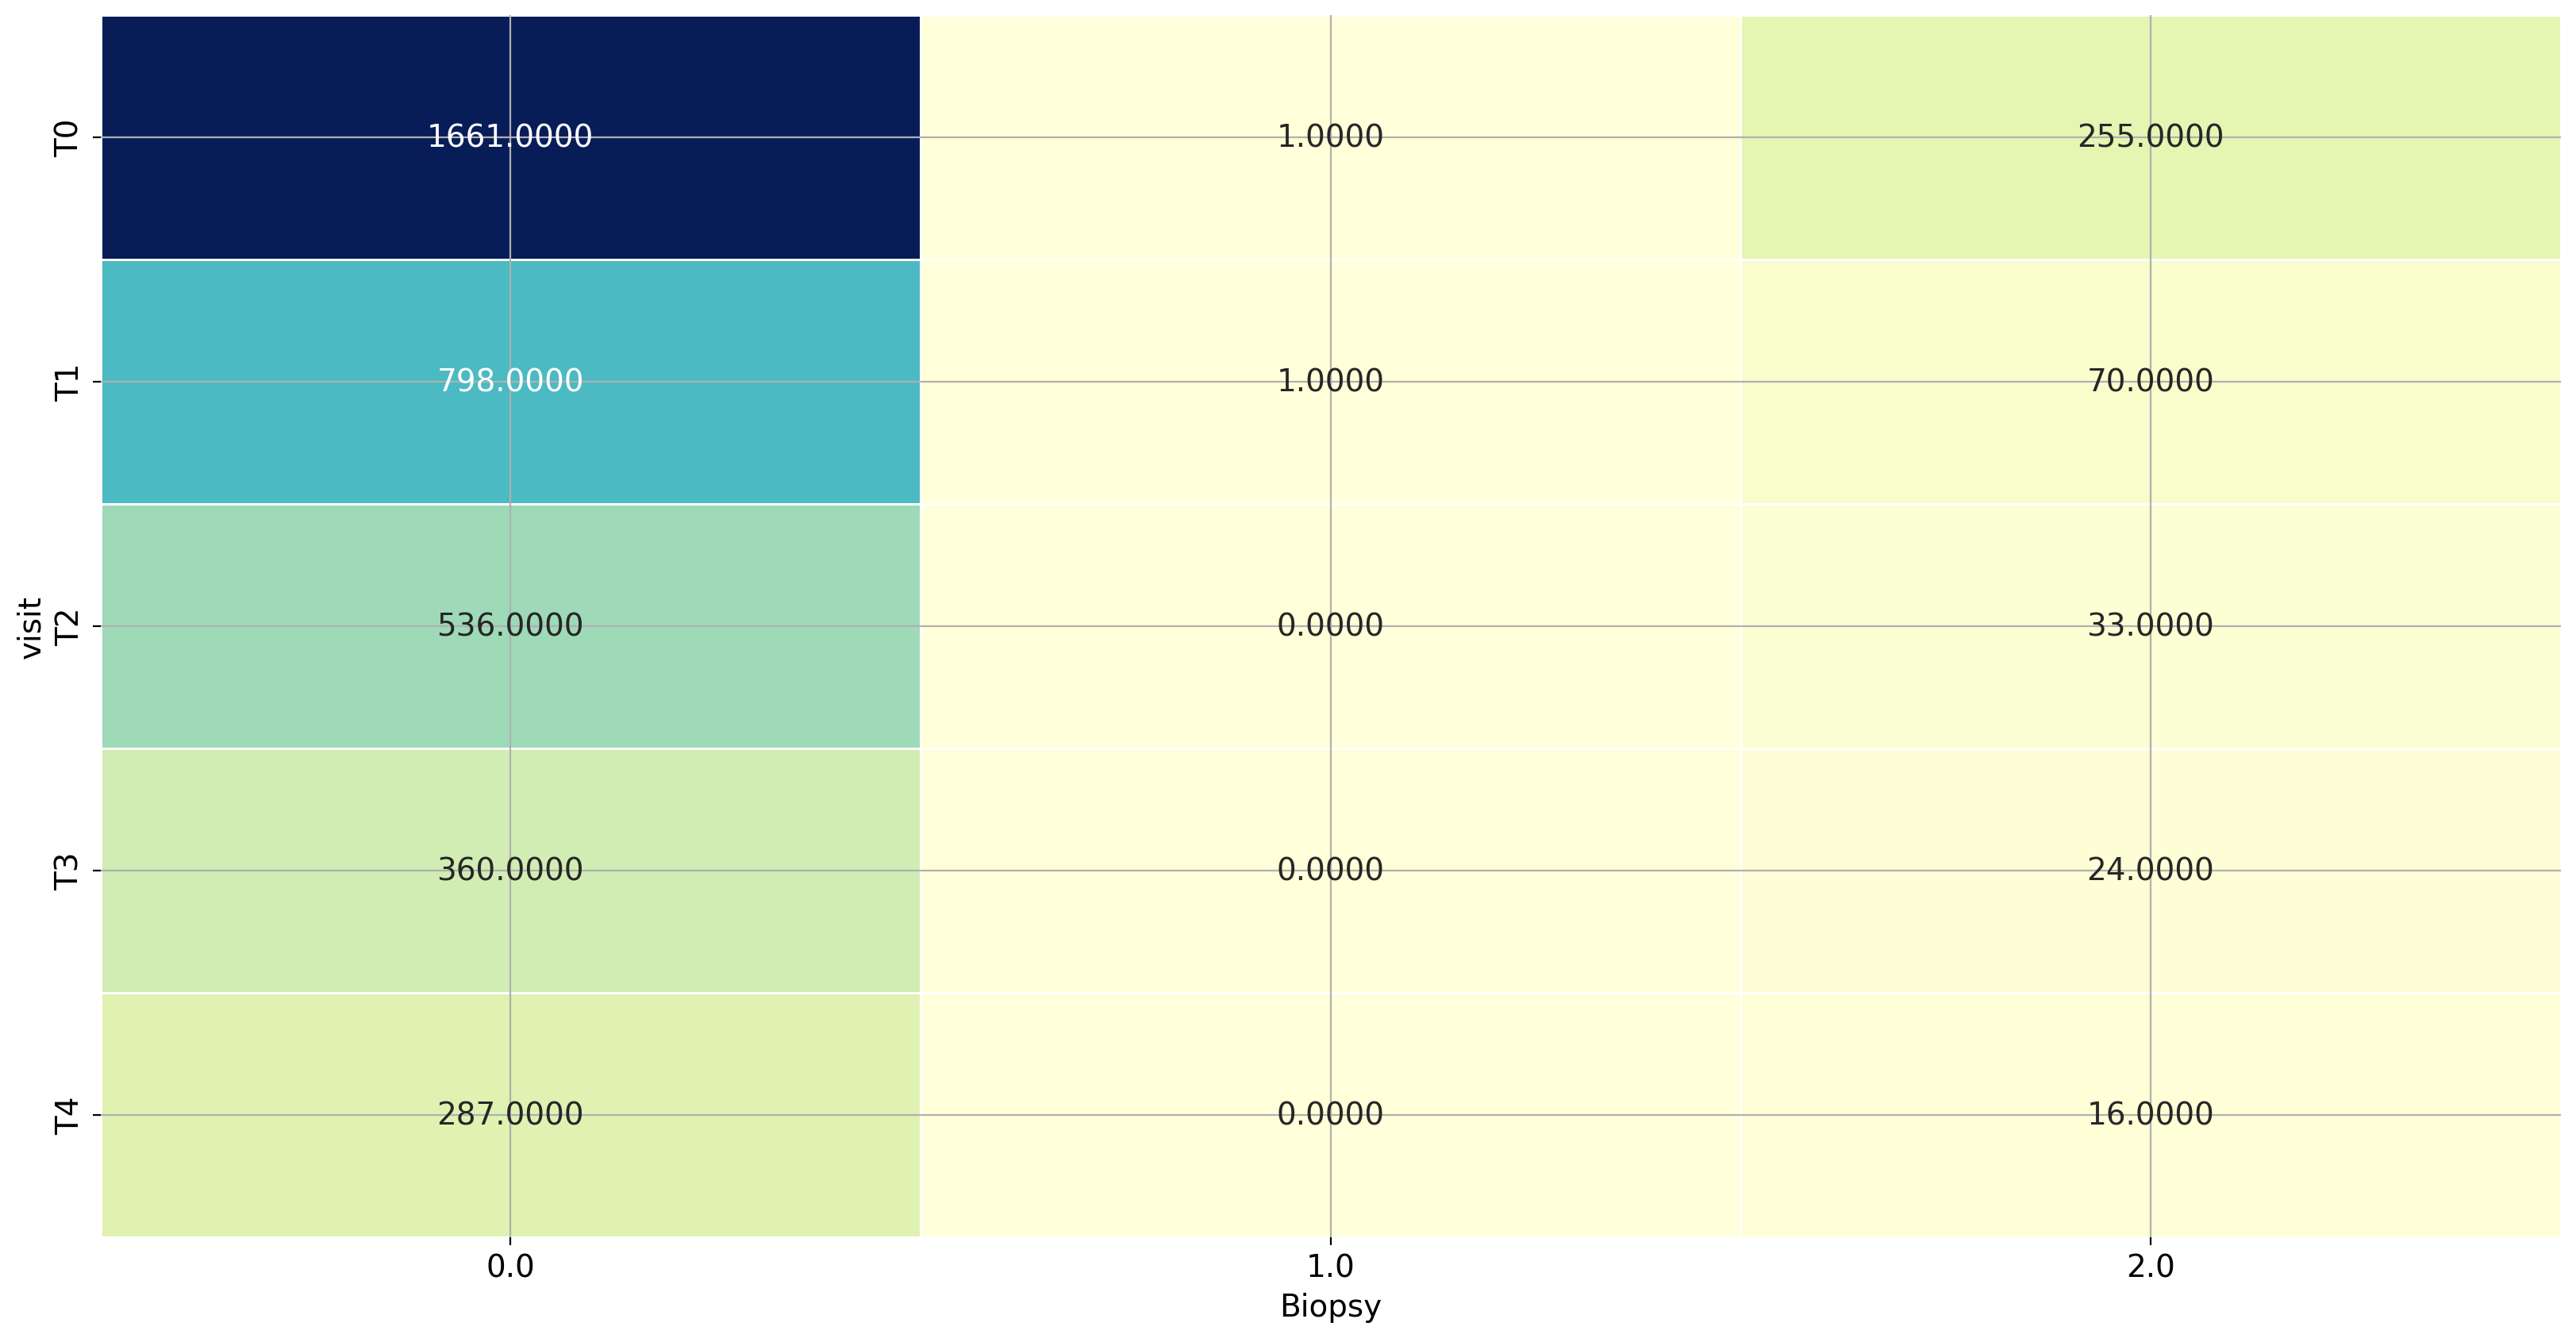

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches

sns.heatmap(pd.crosstab(DF_orig1['visit'],DF_orig1['Biopsy']),cmap="YlGnBu",
            annot=True, cbar=False,linewidths=.5, ax=ax,  fmt='.4f')
plt.show()


In [ ]:
DF_orig.AD

0        1
1        1
2        1
3        1
4        1
        ..
13720    1
13721    0
13722    0
13723    0
13724    0
Name: AD, Length: 13725, dtype: int32

In [ ]:
DF_orig.filter(regex = "fw_Dupilumab")

,fw_Dupilumab
0,0
1,0
2,0
3,0
4,0
...,...
13720,0
13721,0
13722,0
13723,0


In [ ]:
DF_orig.filter(regex = "JAKSTAT").value_counts()

JAKSTAT
0          13615
1            110
Name: count, dtype: int64